<a href="https://colab.research.google.com/github/nahidame/QuaziNahida.github.io/blob/main/5_Project_Credit_Card_Users_Churn_Prediction_Quazi_Nahida_Sultana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b><h2><center>Credit Card Users Churn Prediction - Project </center></h2></b> 

### **Description**

### **Background & Context**

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

As a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

Need to identify the best possible model that will give the required performance




### **Objective**

> **1.** Explore and visualize the dataset <br>
 **2.** Build a classification model to predict if the customer is going to churn or not <br>
 **3.** Optimize the model using appropriate techniques <br>
  **4.** Based on the analysis Generate a set of insights and recommendations that will help the bank <br><br>


### **Key Question:**

> **1.** Is there a good classification model that will help the bank improve its services so that customers do not renounce their credit cards <br> 
> **2.** What does the performance assessment look like for such a model? <br>
> **3.** Does Period of relationship with the bank have any effect on the customer to churn or not? <br> 
> **4.** Does no. of months inactive in the last 12 months have any effect on the customer to churn or not?  <br> 
> **5.** Does Annual Income Category of the account holder have any effect on the customer to churn or not? <br> 

### **Data Description:**

The detailed data dictionary is given below.- <br>

> **1.** CLIENTNUM: Client number. Unique identifier for the customer holding the account <br> 
  **2.** Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer" <br>
  **3.** Customer_Age: Age in Years  <br>
  **4.** Gender: Gender of the account holder <br>
  **5.** Dependent_count: Number of dependents <br>
  **6.** Education_Level:  Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to a college student), Post-Graduate, Doctorate. <br>
  **7.** Marital_Status: Marital Status of the account holder <br>
  **8.** Income_Category: Annual Income Category of the account holder <br>
  **9.** Card_Category: Type of Card <br>
  **10.** Months_on_book: Period of relationship with the bank <br>
   **11.** Total_Relationship_Count: Total no. of products held by the customer <br>
  **12.** Months_Inactive_12_mon: No. of months inactive in the last 12 months <br>
  **13.** Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months <br>
  **14.** Credit_Limit: Credit Limit on the Credit Card <br>
  **15.** Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance <br>
  **16.** Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months) <br>
  **17.** Total_Trans_Amt: Total Transaction Amount (Last 12 months) <br> 
  **18.** Total_Trans_Ct: Total Transaction Count (Last 12 months) <br> 
  **19.** Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter <br> 
  **20.** Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter <br> 
  **21.** Avg_Utilization_Ratio: Represents how much of the available credit the customer spent <br> 

### **Importing the necessary packages**

Let's start by importing necessary libraries

In [ ]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    plot_roc_curve
)

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder


# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import TransformerMixin
from sklearn.preprocessing import FunctionTransformer

# To impute missing values
from sklearn.impute import KNNImputer

# To bin continuous data into intervals
from sklearn.preprocessing import KBinsDiscretizer

# To build a logistic regression model
from sklearn.linear_model import LogisticRegression

# To be used for data scaling and encoding
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    OneHotEncoder,
    RobustScaler,
)


# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

**Importing the dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path="/content/drive/MyDrive/DATA SCIENCE 2022/11_ML_Pipeline_and_Hyperparameter_Tuning/BankChurners.csv" 
data1=pd.read_csv(path)

In [ ]:
# copying data to another variable to avoid any changes to original data
data = data1.copy()

## **Data Overview**

**Checking the data Type of the columns for the dataset**

In [ ]:
# let's check the data type of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

**Observations:**

- There are 1519 missing values in Education_Level column and 749 missing values in Marital_Status column
- Others columns does not have any missing values
- 'Attrition_Flag', 'Gender' , 'Dependent_count', 'Education_Level','Marital_Status', 'Income_Category', 'Card_Category',Total_Relationship_Count', 'Months_Inactive_12_mon','Contacts_Count_12_mon' are categorical  
variables

**View the first and last 5 rows of the dataset**

The initial steps to get an overview of any dataset is to: 
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

In [ ]:
data.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School            NaN  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3     12691.000                  777        11914.000   
1                      2      8256.000                  864         7392.000   
2                      0      3418.000                    0         3418.000   
3                      1      3313.000                 2517          796.000   
4                      0      4716.000                    0         4716.000   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  
0                  0.061  
1                  0.105  
2                  0.000  
3                  0.760  
4                  0.000

In [ ]:
data.tail()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
10122        Graduate         Single     $40K - $60K          Blue   
10123             NaN       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate            NaN     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
10122              40                         3                       2   
10123              25                         4                       2   
10124              36                         5                       3   
10125              36                         4                       3   
10126              25                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
10122                      3      4003.000                 1851   
10123                      3      4277.000                 2186   
10124                      4      5409.000                    0   
10125                      3      5281.000                    0   
10126                      4     10388.000                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
10122         2152.000                 0.703            15476             117   
10123         2091.000                 0.804             8764              69   
10124         5409.000                 0.819            10291              60   
10125         5281.000                 0.535             8395              62   
10126         8427.000                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
10122                0.857                  0.462  
10123                0.683                  0.511  
10124                0.818                  0.000  
10125                0.722                  0.000  
10126                0.649                  0.189

In [ ]:
# let's view a sample of the data
data.sample(n=10, random_state=1)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
6498  712389108  Existing Customer            43      F                2   
9013  718388733  Existing Customer            38      F                1   
2053  710109633  Existing Customer            39      M                2   
3211  717331758  Existing Customer            44      M                4   
5559  709460883  Attrited Customer            38      F                2   
6106  789105183  Existing Customer            54      M                3   
4150  771342183  Attrited Customer            53      F                3   
2205  708174708  Existing Customer            38      M                4   
4145  718076733  Existing Customer            43      M                1   
5324  821889858  Attrited Customer            50      F                1   

     Education_Level Marital_Status Income_Category Card_Category  \
6498        Graduate        Married  Less than $40K          Blue   
9013         College            NaN  Less than $40K          Blue   
2053         College        Married     $60K - $80K          Blue   
3211        Graduate        Married         $120K +          Blue   
5559       Doctorate        Married  Less than $40K          Blue   
6106   Post-Graduate         Single    $80K - $120K        Silver   
4150        Graduate         Single     $40K - $60K          Blue   
2205        Graduate        Married     $40K - $60K          Blue   
4145        Graduate         Single     $60K - $80K        Silver   
5324       Doctorate         Single             abc          Blue   

      Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
6498              36                         6                       3   
9013              32                         2                       3   
2053              31                         6                       3   
3211              32                         6                       3   
5559              28                         5                       2   
6106              42                         3                       1   
4150              40                         6                       3   
2205              27                         6                       2   
4145              31                         4                       3   
5324              46                         6                       4   

      Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
6498                      2      2570.000                 2107   
9013                      3      2609.000                 1259   
2053                      2      9871.000                 1061   
3211                      4     34516.000                 2517   
5559                      4      1614.000                    0   
6106                      2     34516.000                 2488   
4150                      2      1625.000                    0   
2205                      4      5535.000                 1276   
4145                      3     25824.000                 1170   
5324                      3      1970.000                 1477   

      Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
6498          463.000                 0.651             4058              83   
9013         1350.000                 0.871             8677              96   
2053         8810.000                 0.545             1683              34   
3211        31999.000                 0.765             4228              83   
5559         1614.000                 0.609             2437              46   
6106        32028.000                 0.552             4401              87   
4150         1625.000                 0.689             2314              43   
2205         4259.000                 0.636             1764              38   
4145        24654.000                 0.684             3101              73   
5324          493.000                 0.662             2493       

In [ ]:
data.shape

(10127, 21)

- *The dataset has 10127 rows and 21 columns* 

In [ ]:
data.isnull().sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

- Education_Level and Marital_Status have 1519 and 749 missing values in the columns respectively

### **Statistical summary**

In [ ]:
# let's view the statistical summary of the numerical columns in the data
data.describe().T

count          mean          std           min  \
CLIENTNUM                10127.000 739177606.334 36903783.450 708082083.000   
Customer_Age             10127.000        46.326        8.017        26.000   
Dependent_count          10127.000         2.346        1.299         0.000   
Months_on_book           10127.000        35.928        7.986        13.000   
Total_Relationship_Count 10127.000         3.813        1.554         1.000   
Months_Inactive_12_mon   10127.000         2.341        1.011         0.000   
Contacts_Count_12_mon    10127.000         2.455        1.106         0.000   
Credit_Limit             10127.000      8631.954     9088.777      1438.300   
Total_Revolving_Bal      10127.000      1162.814      814.987         0.000   
Avg_Open_To_Buy          10127.000      7469.140     9090.685         3.000   
Total_Amt_Chng_Q4_Q1     10127.000         0.760        0.219         0.000   
Total_Trans_Amt          10127.000      4404.086     3397.129       510.000   
Total_Trans_Ct           10127.000        64.859       23.473        10.000   
Total_Ct_Chng_Q4_Q1      10127.000         0.712        0.238         0.000   
Avg_Utilization_Ratio    10127.000         0.275        0.276         0.000   

                                   25%           50%           75%  \
CLIENTNUM                713036770.500 717926358.000 773143533.000   
Customer_Age                    41.000        46.000        52.000   
Dependent_count                  1.000         2.000         3.000   
Months_on_book                  31.000        36.000        40.000   
Total_Relationship_Count         3.000         4.000         5.000   
Months_Inactive_12_mon           2.000         2.000         3.000   
Contacts_Count_12_mon            2.000         2.000         3.000   
Credit_Limit                  2555.000      4549.000     11067.500   
Total_Revolving_Bal            359.000      1276.000      1784.000   
Avg_Open_To_Buy               1324.500      3474.000      9859.000   
Total_Amt_Chng_Q4_Q1             0.631         0.736         0.859   
Total_Trans_Amt               2155.500      3899.000      4741.000   
Total_Trans_Ct                  45.000        67.000        81.000   
Total_Ct_Chng_Q4_Q1              0.582         0.702         0.818   
Avg_Utilization_Ratio            0.023         0.176         0.503   

                                   max  
CLIENTNUM                828343083.000  
Customer_Age                    73.000  
Dependent_count                  5.000  
Months_on_book                  56.000  
Total_Relationship_Count         6.000  
Months_Inactive_12_mon           6.000  
Contacts_Count_12_mon            6.000  
Credit_Limit                 34516.000  
Total_Revolving_Bal           2517.000  
Avg_Open_To_Buy              34516.000  
Total_Amt_Chng_Q4_Q1             3.397  
Total_Trans_Amt              18484.000  
Total_Trans_Ct                 139.000  
Total_Ct_Chng_Q4_Q1              3.714  
Avg_Utilization_Ratio            0.999

**Observations**

- Minimum age of customer is 26 and Maximum age is 73 with mean of 46.This shows that majority of the customers are under 46 years of age.
- Mean Month on book is 36, 13 min and 56 max,  showing that the dataset captures data for customers with the bank at least 1 whole years
- Average Credit Limit 8631 where the maximum is 34516 and minimum 1438. There might be outlier in the data
- Min Total trans amount 510, max 18484 and mean 4404. 
- Dependent Count column has mean and median of ~2
- Total Relationship Count has mean and median of ~4
- Total Transaction Count has mean of ~65 and median of 67

## **Data Pre-Processing**

In [ ]:
data.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 6
Marital_Status                  3
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

- The variable CLIENTNUM does not add any interesting information. There is no association between a person's CLIENTNUM.  It does not provide any general conclusion for future potential customers. We can neglect this information for our model prediction. So we can drop the column.
- There are 10 catagorical variable column

In [ ]:
data[data.duplicated()].count()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

- There is no duplicated data

In [ ]:
# Below function prints unique value counts and percentages for the category/object type variables


def category_unique_value():
    for cat_cols in (
        data.select_dtypes(exclude=[np.int64, np.float64]).columns.unique().to_list()
    ):
        print("Unique values and corresponding data counts for feature: " + cat_cols)
        print("-" * 90)
        df_temp = pd.concat(
            [
                data[cat_cols].value_counts(),
                data[cat_cols].value_counts(normalize=True) * 100,
            ],
            axis=1,
        )
        df_temp.columns = ["Count", "Percentage"]
        print(df_temp)
        print("-" * 90)

In [ ]:
category_unique_value()

Unique values and corresponding data counts for feature: Attrition_Flag
------------------------------------------------------------------------------------------
                   Count  Percentage
Existing Customer   8500      83.934
Attrited Customer   1627      16.066
------------------------------------------------------------------------------------------
Unique values and corresponding data counts for feature: Gender
------------------------------------------------------------------------------------------
   Count  Percentage
F   5358      52.908
M   4769      47.092
------------------------------------------------------------------------------------------
Unique values and corresponding data counts for feature: Education_Level
------------------------------------------------------------------------------------------
               Count  Percentage
Graduate        3128      36.338
High School     2013      23.385
Uneducated      1487      17.275
College         1013      11.7

### **Pre-EDA data processing**

#### **Droping CLIENTNUM**

The variable CLIENTNUM does not add any interesting information.

In [ ]:
data.drop(['CLIENTNUM'],axis=1,inplace=True)

- Income catergory have abc value , we need to treat  the data

### **Missing-Value Treatment**

* We will use median to impute missing values in Income column. We have decided to impute this variable with median as data is skewed. 

Note:   The missing value treatment should be done after splitting the data into Train, Validation and Test sets. However, in this case, the treatment is generic, since we are filling in the data with Unknown. Thus, the treatment can be done on the overall dataset. Similar strategy is applicable for treating the Income Category column value abc

In [ ]:
# Treating missing values in Education Level and Marital Status

data["Education_Level"] = data["Education_Level"].fillna("Unknown")
data["Marital_Status"] = data["Marital_Status"].fillna("Unknown")

In [ ]:
# Treating Income Category = abc
data.loc[data[data["Income_Category"] == "abc"].index, "Income_Category"] = "Unknown"

In [ ]:
category_unique_value()

Unique values and corresponding data counts for feature: Attrition_Flag
------------------------------------------------------------------------------------------
                   Count  Percentage
Existing Customer   8500      83.934
Attrited Customer   1627      16.066
------------------------------------------------------------------------------------------
Unique values and corresponding data counts for feature: Gender
------------------------------------------------------------------------------------------
   Count  Percentage
F   5358      52.908
M   4769      47.092
------------------------------------------------------------------------------------------
Unique values and corresponding data counts for feature: Education_Level
------------------------------------------------------------------------------------------
               Count  Percentage
Graduate        3128      30.888
High School     2013      19.878
Unknown         1519      15.000
Uneducated      1487      14.6

In [ ]:
# let's check for missing values in the data
df_null_summary = pd.concat(
    [data.isnull().sum(), data.isnull().sum() * 100 / data.isnull().count()], axis=1
)
df_null_summary.columns = ["Null Record Count", "Percentage of Null Records"]
df_null_summary[df_null_summary["Null Record Count"] > 0].sort_values(
    by="Percentage of Null Records", ascending=False
).style.background_gradient(cmap="YlOrRd")

In [ ]:
category_columns = data.select_dtypes(include="object").columns.tolist()

In [ ]:
data[category_columns] = data[category_columns].astype("category")

In [ ]:
data.columns = [i.replace(" ", "_").lower() for i in data.columns]

In [ ]:
data.describe(include=['category']).T

count unique                top  freq
attrition_flag   10127      2  Existing Customer  8500
gender           10127      2                  F  5358
education_level  10127      7           Graduate  3128
marital_status   10127      4            Married  4687
income_category  10127      6     Less than $40K  3561
card_category    10127      4               Blue  9436

- Existing customer frequency is 8500
- female customer is more than male
- Graduate is more common as a customer Education level 
- The customer with income Less than $40K is frequent customer in the bank 
- Most customer use blue card

## **Exploratory Data Analysis**



### Univariate analysis

***Dist_Box plot***

In [ ]:
def dist_box(data):
 # function plots a combined graph for univariate analysis of continous variable 
 #to check spread, central tendency , dispersion and outliers  
    Name=data.name.upper()
    fig,(ax_box,ax_dis)  =plt.subplots(nrows=2,sharex=True,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))
    mean=data.mean()
    median=data.median()
    mode=data.mode().tolist()[0]
    sns.set_theme(style="white")
    fig.suptitle("SPREAD OF DATA FOR "+ Name  , fontsize=18, fontweight='bold')
    sns.boxplot(x=data,showmeans=True, orient='h',color="teal",ax=ax_box)
    ax_box.set(xlabel='')
     # just trying to make visualisation better. This will set background to white
    sns.despine(top=True,right=True,left=True) # to remove side line from graph
    sns.distplot(data,kde=False,color='purple',ax=ax_dis)
    ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
    plt.legend({'Mean':mean,'Median':median,'Mode':mode})
                    

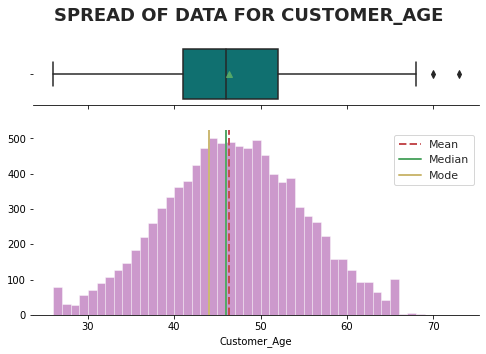

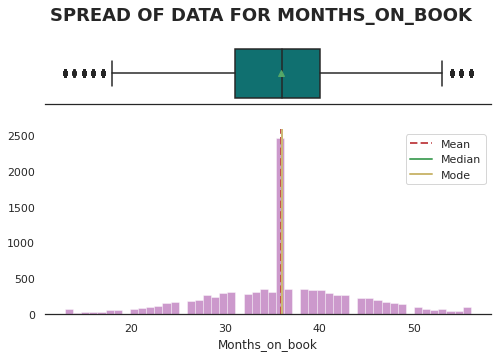

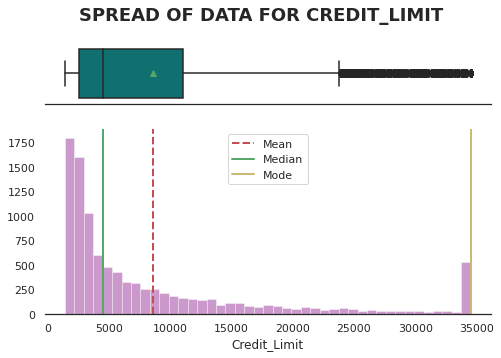

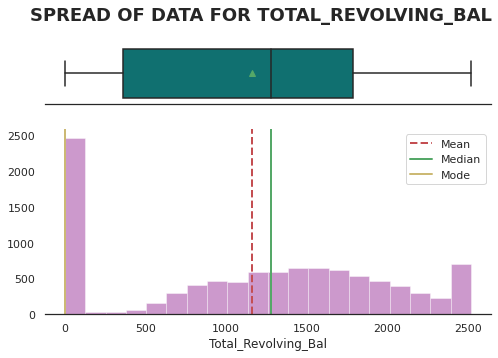

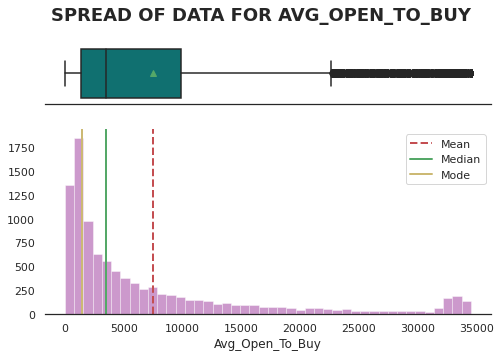

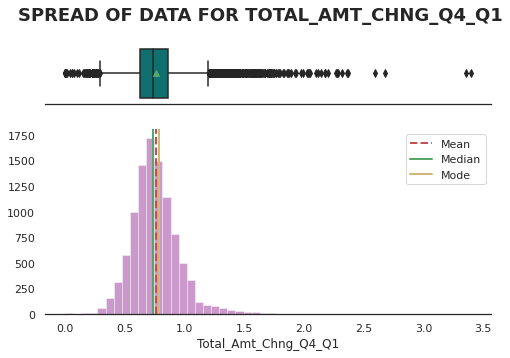

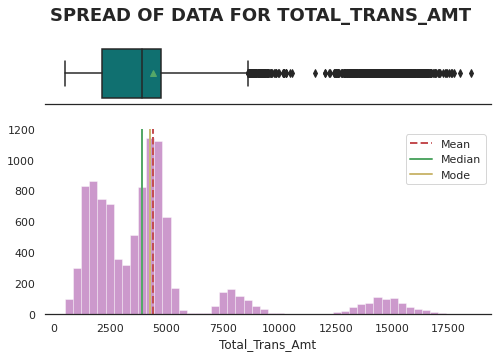

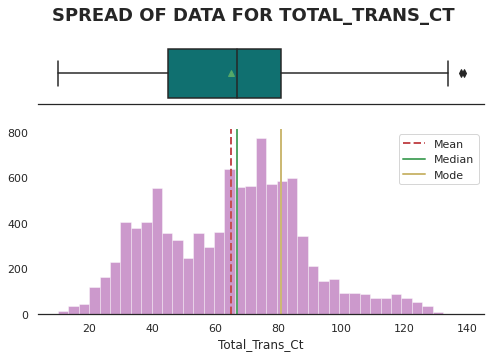

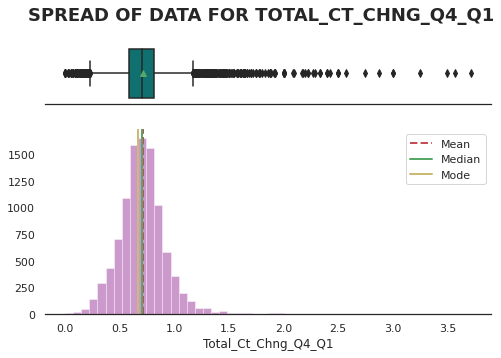

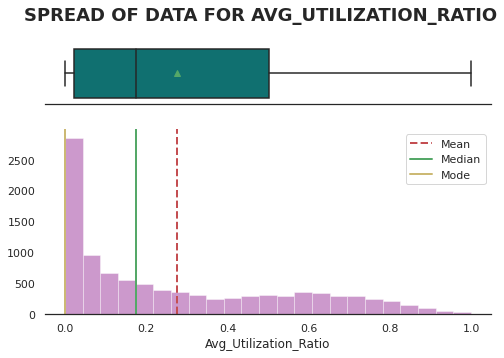

In [ ]:
#select all quantitative columns for checking the spread
list_col=  data.select_dtypes(include='number').columns.to_list()

for i in range(len(list_col)):
    dist_box(data[list_col[i]])

**Observations**

- Customer Age is normally distrubted with the mean age of 47 and have only two outliers in right side of the data

- Month on book has lots of outlier in both side. Average month is 37. Need to see if the outliers are to be treated.

- The credit limit is highly right skewed. 

- Total revolving balance of 0 would mean the customer never uses the credit card

- Average Open to Buy has lots of higher end outliers, which means there are customers who uses only very small amount of their credit limit
Data is right skewed
- Outliers are on both higher and lower end for total_amt_chng_q4_q1
- Total Transaction Amount has lots of higher end outliers 
- Average utilization is right skewed


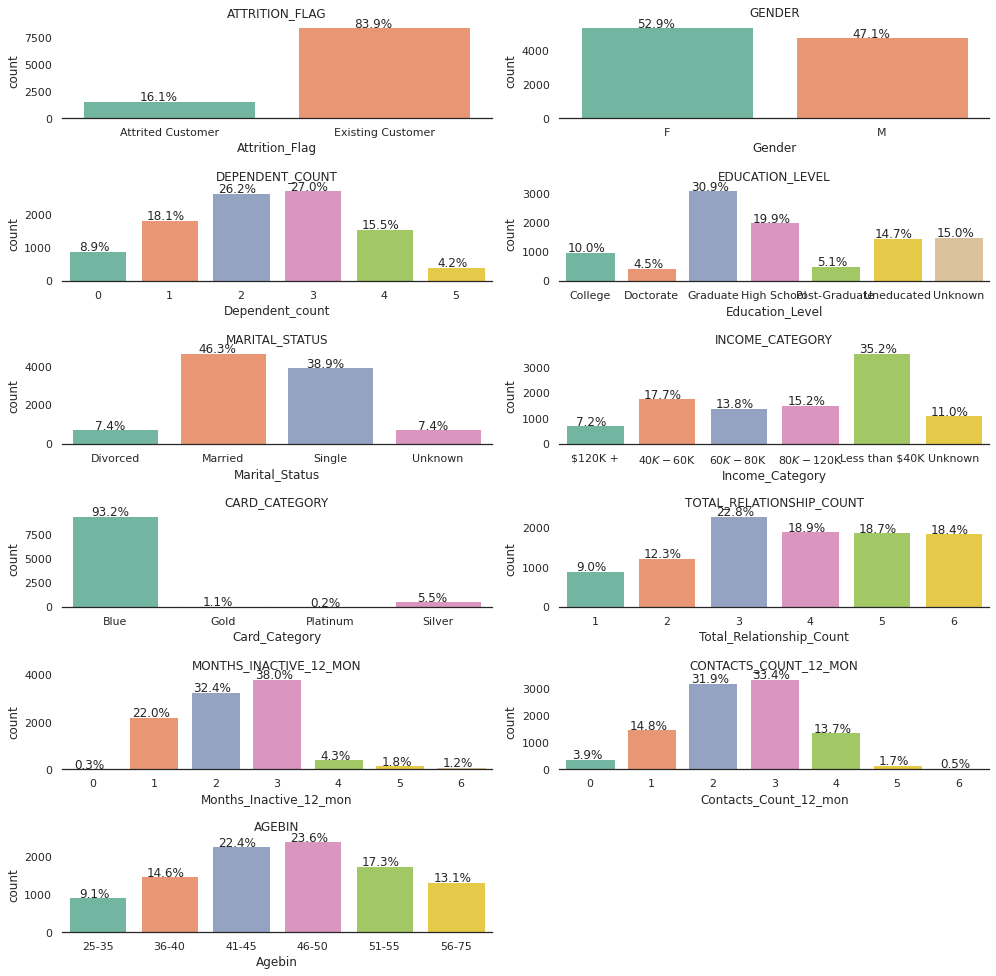

In [ ]:
# Making a list of all categorical variables

plt.figure(figsize=(14,20))

sns.set_theme(style="white") 
cols=['Attrition_Flag', 'Gender' , 'Dependent_count', 'Education_Level', 
            'Marital_Status', 'Income_Category', 'Card_Category', 
            'Total_Relationship_Count', 'Months_Inactive_12_mon', 
            'Contacts_Count_12_mon','Agebin']
for i, variable in enumerate(cols):
                     plt.subplot(9,2,i+1)
                     order = data[variable].value_counts(ascending=False).index   
                     #sns.set_palette(list_palette[i]) # to set the palette
                     sns.set_palette('Set2')
                     ax=sns.countplot(x=data[variable], data=data )
                     sns.despine(top=True,right=True,left=True) # to remove side line from graph
                     for p in ax.patches:
                           percentage = '{:.1f}%'.format(100 * p.get_height()/len(data[variable]))
                           x = p.get_x() + p.get_width() / 2 - 0.05
                           y = p.get_y() + p.get_height()
                           plt.annotate(percentage, (x, y),ha='center')
                     plt.tight_layout()
                     plt.title(cols[i].upper())

**Observations**

- High Imbalance in data since the existing vs. attrited customers ratio is 84:16
- Data is almost equally distributed between Males and Females
- 31% customers are Graduate
- ~85% customers are either Single or Married, where - 46.7% of the customers are Married
- 35% customers earn less than 40k and 36% earns  $60k or more
- ~93% customers have Blue card

### **Box Plot** 

In [ ]:
### Function to plot distributions and Boxplots of customers
def plot(x,target='Attrition_Flag'):
    fig,axs = plt.subplots(2,2, figsize=(12,10))
    axs[0, 0].set_title(f'Distribution of {x} \n of a customer who had Not Attrition Flag',fontsize=12,fontweight='bold')
    sns.distplot(data[(data[target] == 'Existing Customer')][x],ax=axs[0,0],color='teal')
    axs[0, 1].set_title(f"Distribution of {x}\n of a customer who had Attrition Flag",fontsize=12,fontweight='bold')
    sns.distplot(data[(data[target] == 'Attrited Customer')][x],ax=axs[0,1],color='orange')
    axs[1,0].set_title(f'Boxplot of {x} w.r.t Attrition Flag',fontsize=12,fontweight='bold')
    
    line = plt.Line2D((.1,.9),(.5,.5), color='grey', linewidth=1.5,linestyle='--')
    fig.add_artist(line)
   
    sns.boxplot(data[target],data[x],ax=axs[1,0],palette='gist_rainbow',showmeans=True)
    axs[1,1].set_title(f'Boxplot of {x} w.r.t Attrition Flag - Without outliers',fontsize=12,fontweight='bold')
    sns.boxplot(data[target],data[x],ax=axs[1,1],showfliers=False,palette='gist_rainbow',showmeans=True) #turning off outliers from boxplot
    sns.despine(top=True,right=True,left=True) # to remove side line from graph
    plt.tight_layout(pad=4)
    plt.show()

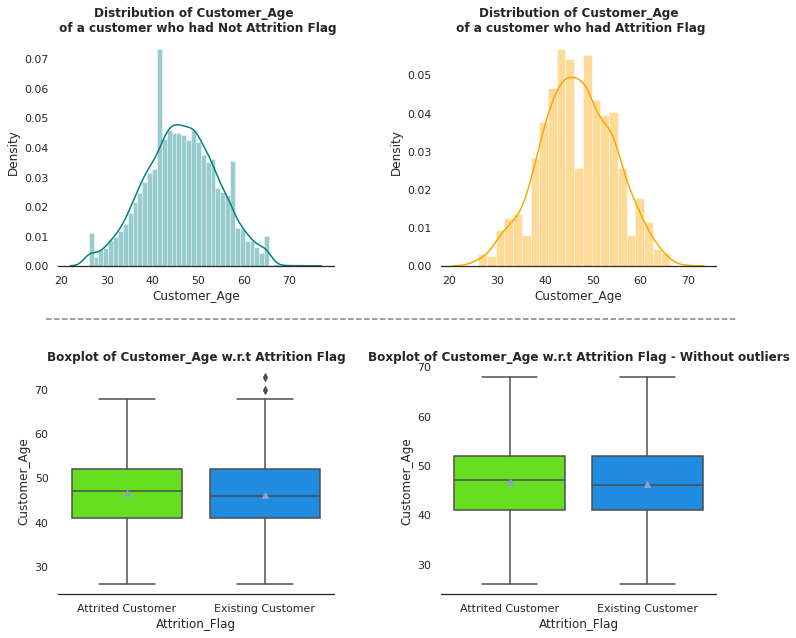

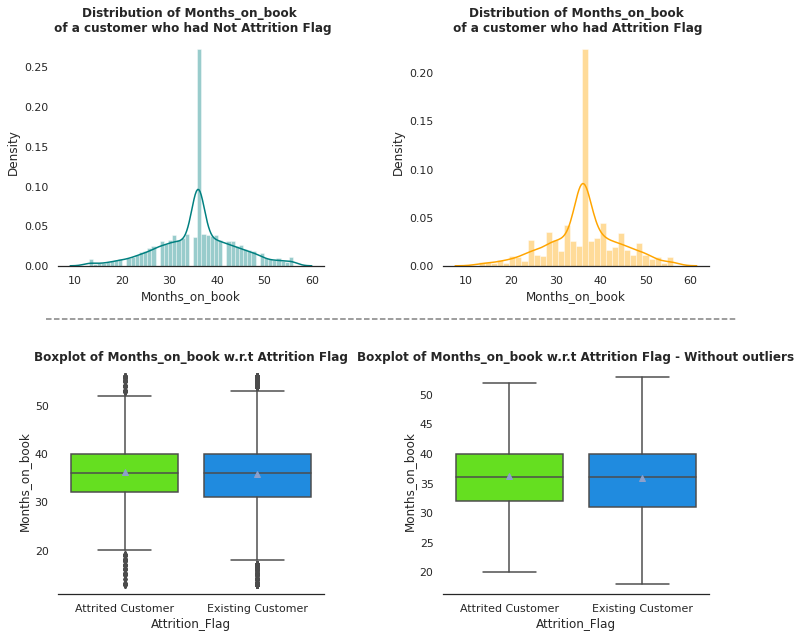

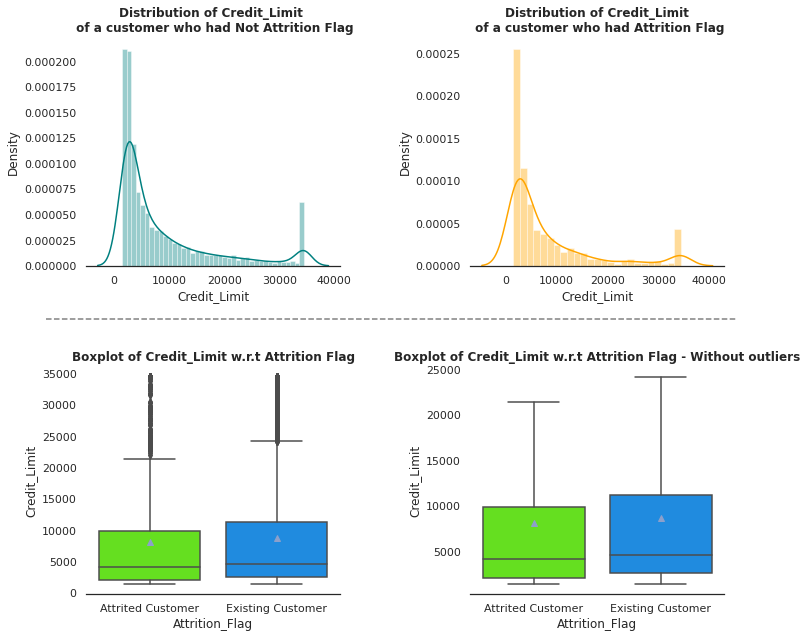

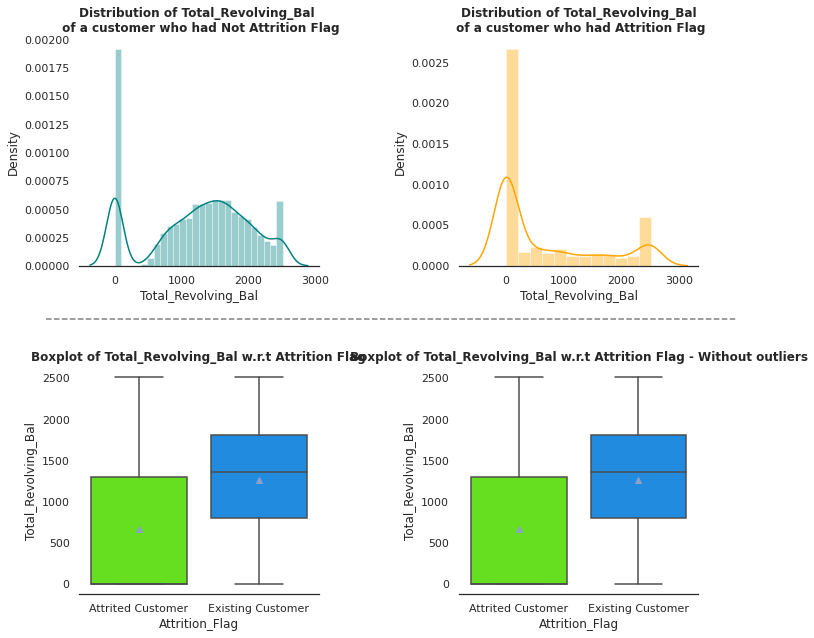

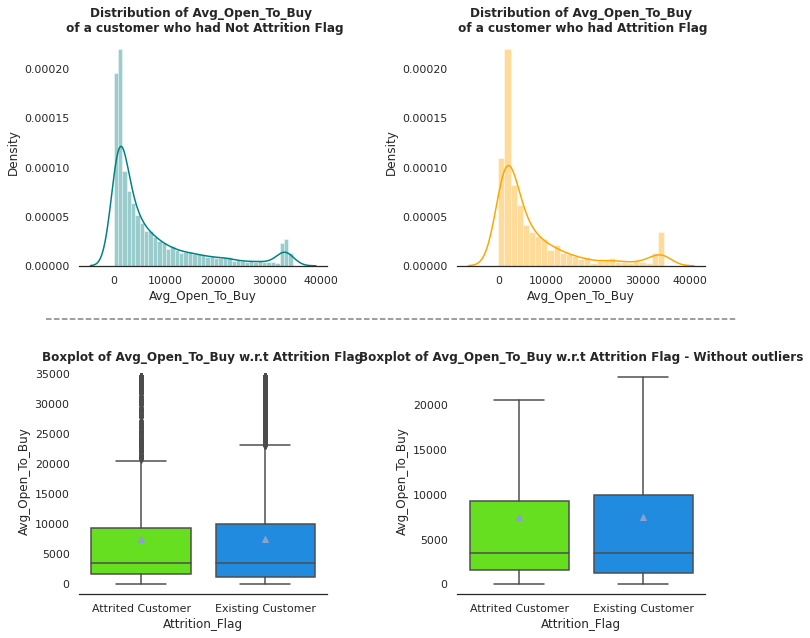

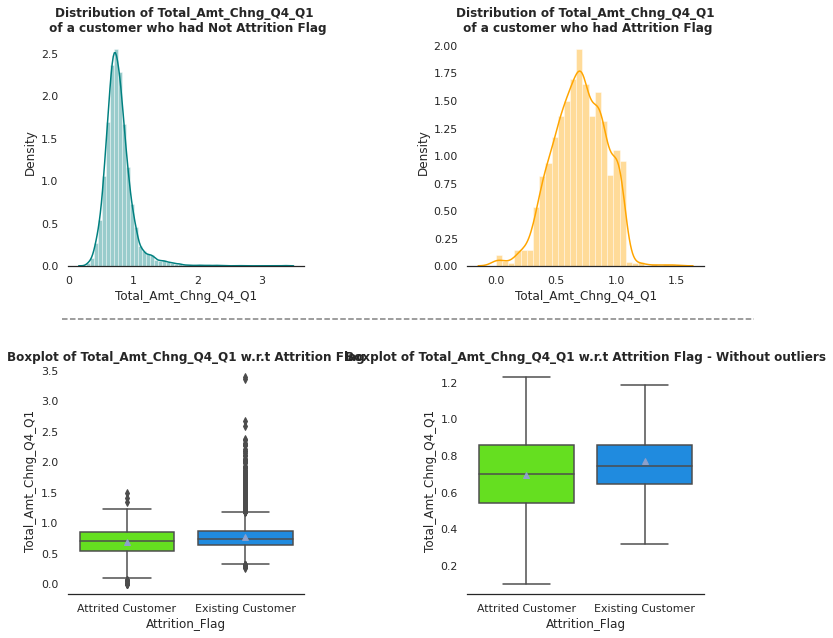

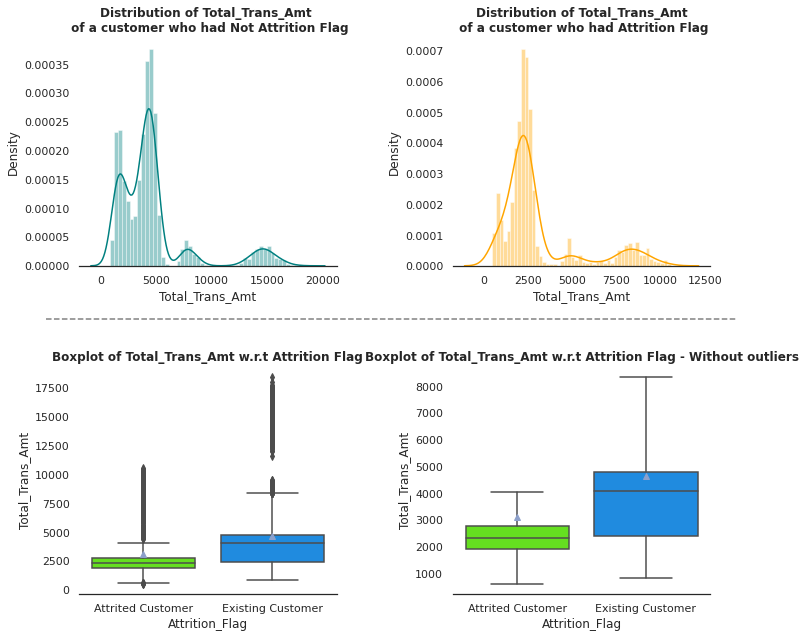

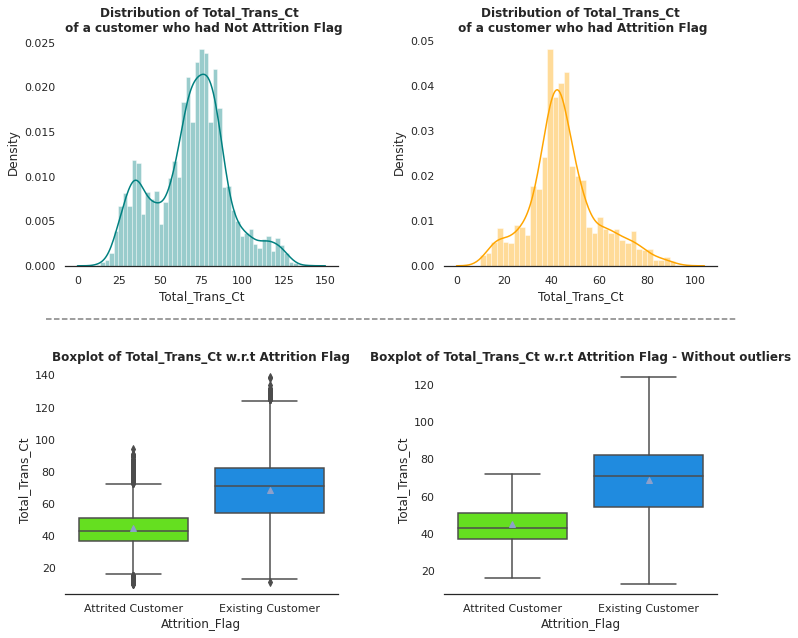

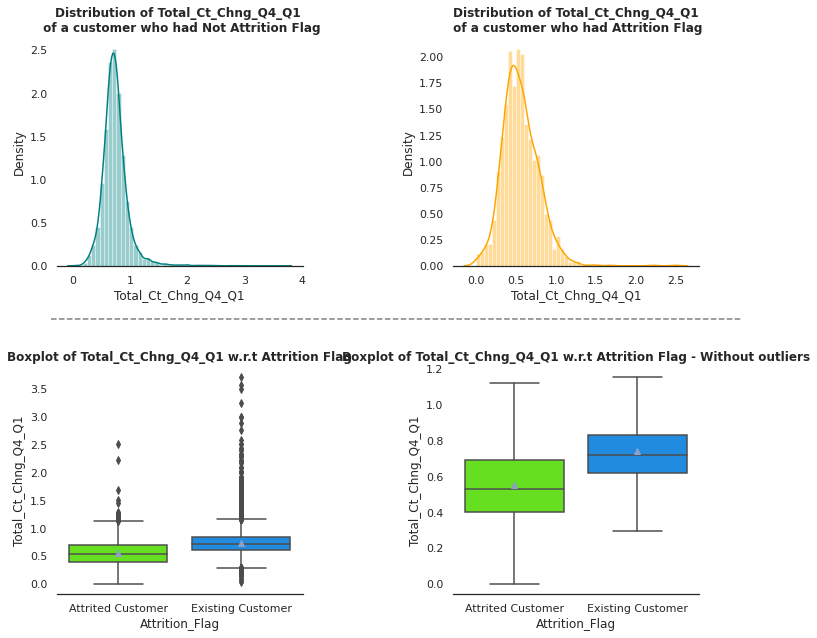

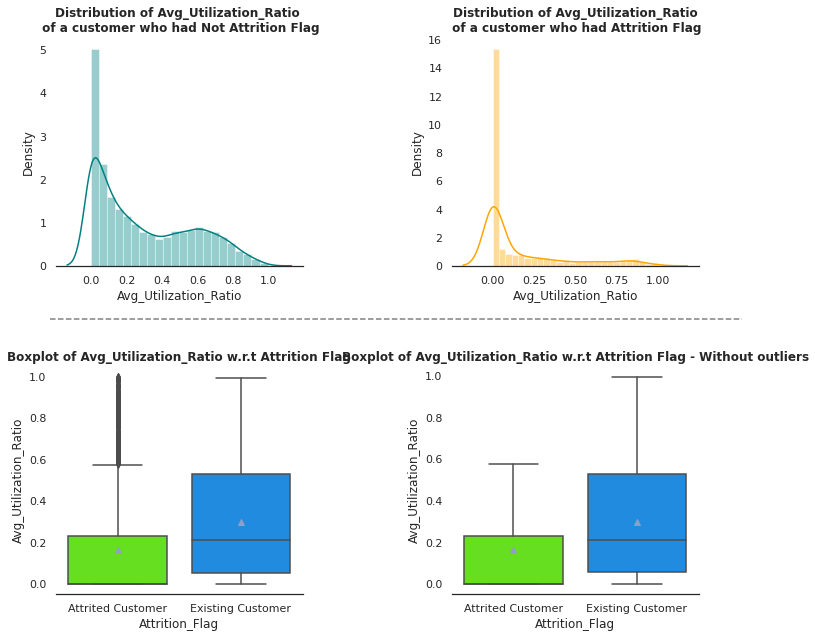

In [ ]:
#select all quantitative columns for checking the spread

list_col=data.select_dtypes(include='number').columns.to_list()
#print(list_col)
#plt.figure(figsize=(14,23))
for j in range(len(list_col)):
   plot(list_col[j])

**Observation**

Attrited customers have  

- Lower total transaction amount
- Lower total transaction count
- Lower utilization ratio
- Lower transaction count change Q4 to Q1
- Higher number of times contacted with or by the bank

### **Target vs. All Categorical Columns**

In [ ]:
# Create a function that returns a Pie chart and a Bar Graph for the categorical variables:
def cat_view(df: pd.DataFrame, x, target):
    """
    Function to create a Bar chart and a Pie chart for categorical variables.
    """
    from matplotlib import cm

    color1 = cm.inferno(np.linspace(0.4, 0.8, 30))
    color2 = cm.viridis(np.linspace(0.4, 0.8, 30))
    sns.set_palette("cubehelix")
    fig, ax = plt.subplots(1, 2, figsize=(16, 4))

    """
    Draw a Pie Chart on first subplot.
    """
    s = data.groupby(x).size()

    mydata_values = s.values.tolist()
    mydata_index = s.index.tolist()

    def func(pct, allvals):
        absolute = int(pct / 100.0 * np.sum(allvals))
        return "{:.1f}%\n({:d})".format(pct, absolute)

    wedges, texts, autotexts = ax[0].pie(
        mydata_values,
        autopct=lambda pct: func(pct, mydata_values),
        textprops=dict(color="w"),
    )

    ax[0].legend(
        wedges,
        mydata_index,
        title=x.capitalize(),
        loc="center left",
        bbox_to_anchor=(1, 0, 0.5, 1),
    )

    plt.setp(autotexts, size=12)

    ax[0].set_title(f"{x.capitalize()} Pie Chart")

    """
    Draw a Bar Graph on second subplot.
    """

    df = pd.pivot_table(
        data, index=[x], columns=[target], values=["Credit_Limit"], aggfunc=len
    )

    labels = df.index.tolist()
    no = df.values[:, 1].tolist()
    yes = df.values[:, 0].tolist()

    l = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    rects1 = ax[1].bar(
        l - width / 2, no, width, label="Existing Customer", color=color1
    )
    rects2 = ax[1].bar(
        l + width / 2, yes, width, label="Attrited Customer", color=color2
    )

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax[1].set_ylabel("Scores")
    ax[1].set_title(f"{x.capitalize()} Bar Graph")
    ax[1].set_xticks(l)
    ax[1].set_xticklabels(labels)
    ax[1].legend()

    def autolabel(rects):

        """Attach a text label above each bar in *rects*, displaying its height."""

        for rect in rects:
            height = rect.get_height()
            ax[1].annotate(
                "{}".format(height),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                fontsize="medium",
                ha="center",
                va="bottom",
            )

    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()
    plt.show()

    """
    Draw a Stacked Bar Graph on bottom.
    """

    sns.set(palette="tab10")
    tab = pd.crosstab(data[x], data[target], normalize="index")

    tab.plot.bar(stacked=True, figsize=(16, 3))
    plt.title(x.capitalize() + " Stacked Bar Plot")
    plt.legend(loc="upper right", bbox_to_anchor=(0, 1))
    plt.show()


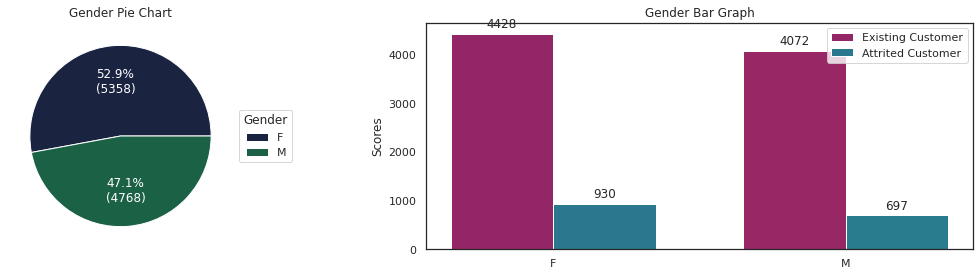

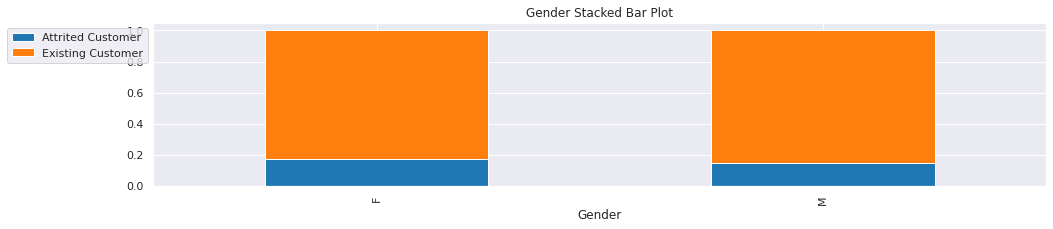

In [ ]:
cat_view(data, "Gender", "Attrition_Flag")

-  Attrition does not seem to be related with Gender

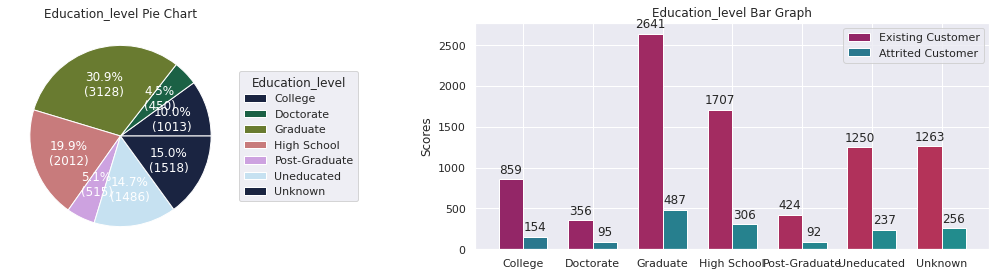

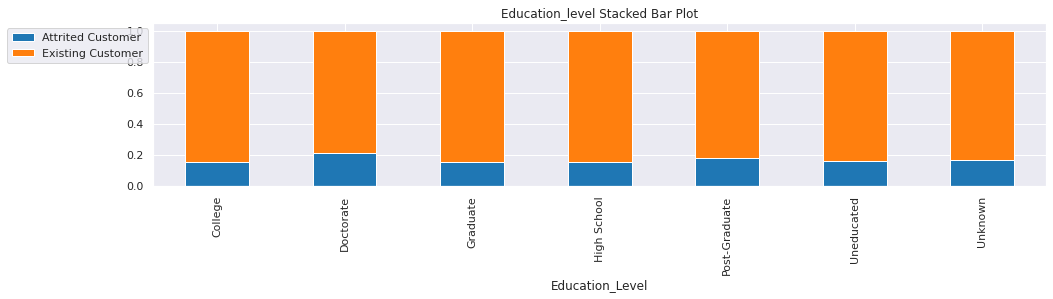

In [ ]:
cat_view(data, "Education_Level", "Attrition_Flag")

- Attrition does not seem to be related with Education

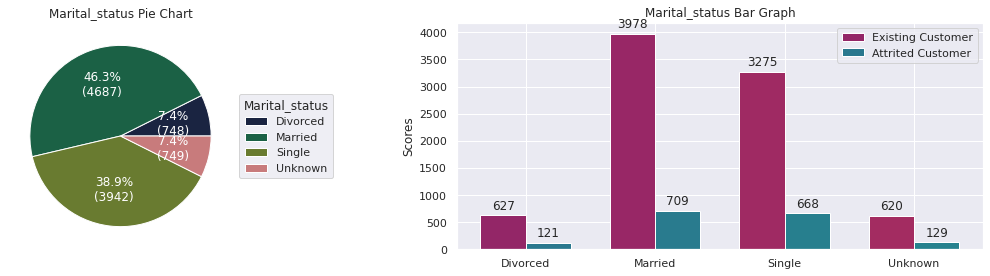

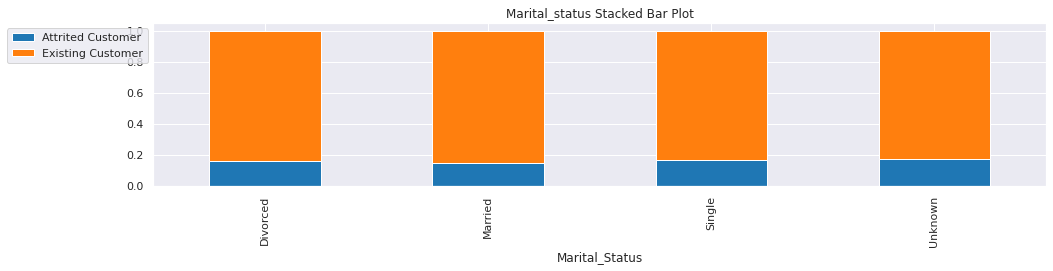

In [ ]:
cat_view(data, "Marital_Status", "Attrition_Flag") 

- Attrition does not seem to be related with Marital Status

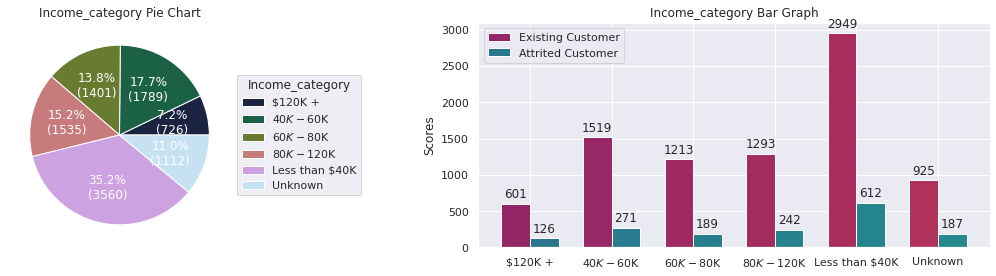

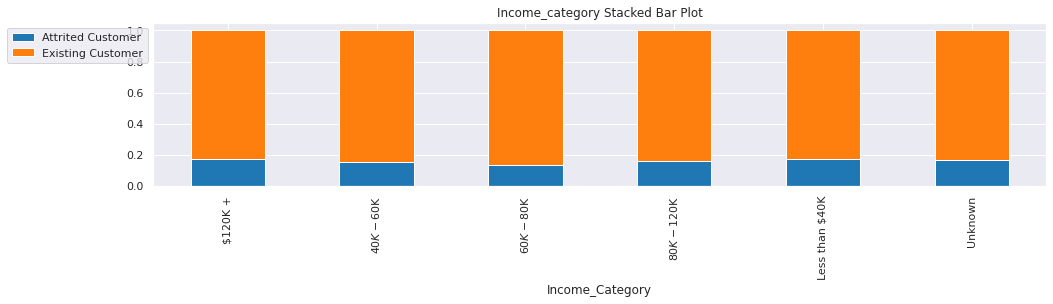

In [ ]:
cat_view(data, "Income_Category", "Attrition_Flag")

- Attrition does not seem to be related with Income Category

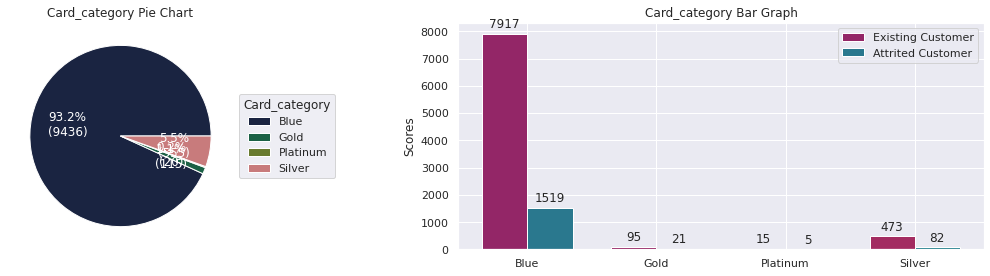

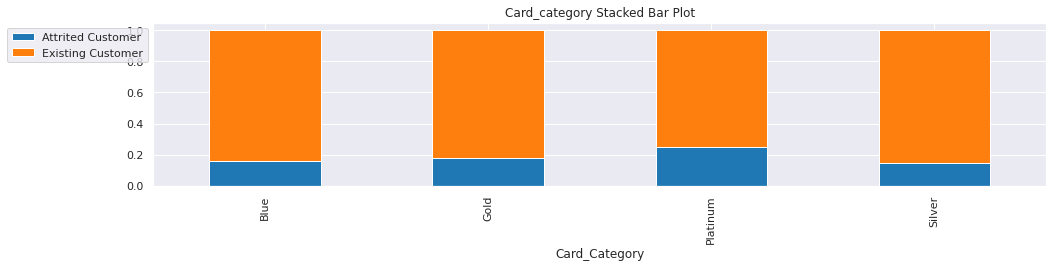

In [ ]:
cat_view(data, "Card_Category", "Attrition_Flag")

- Platinum card holder are appearing to be having attrition tendency, however, since there are only 20 data points for platinum card holders, this observation would be biased

### **Bivariate Analysis**

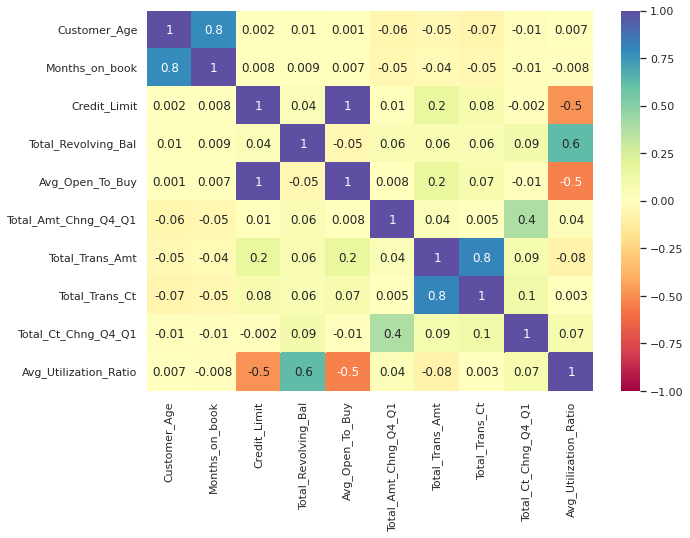

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,fmt='.1g',cmap="Spectral")
plt.show()

- Credit Limit and Average Open to Buy have 100% collinearity
- Months on book and Customer Age have quite strong correlation
- Average Utilization Ratio and Total Revolving Balance are also a bit correlated it appears


**Pairplot of all available numeric columns, hued by Attrition_Flag**

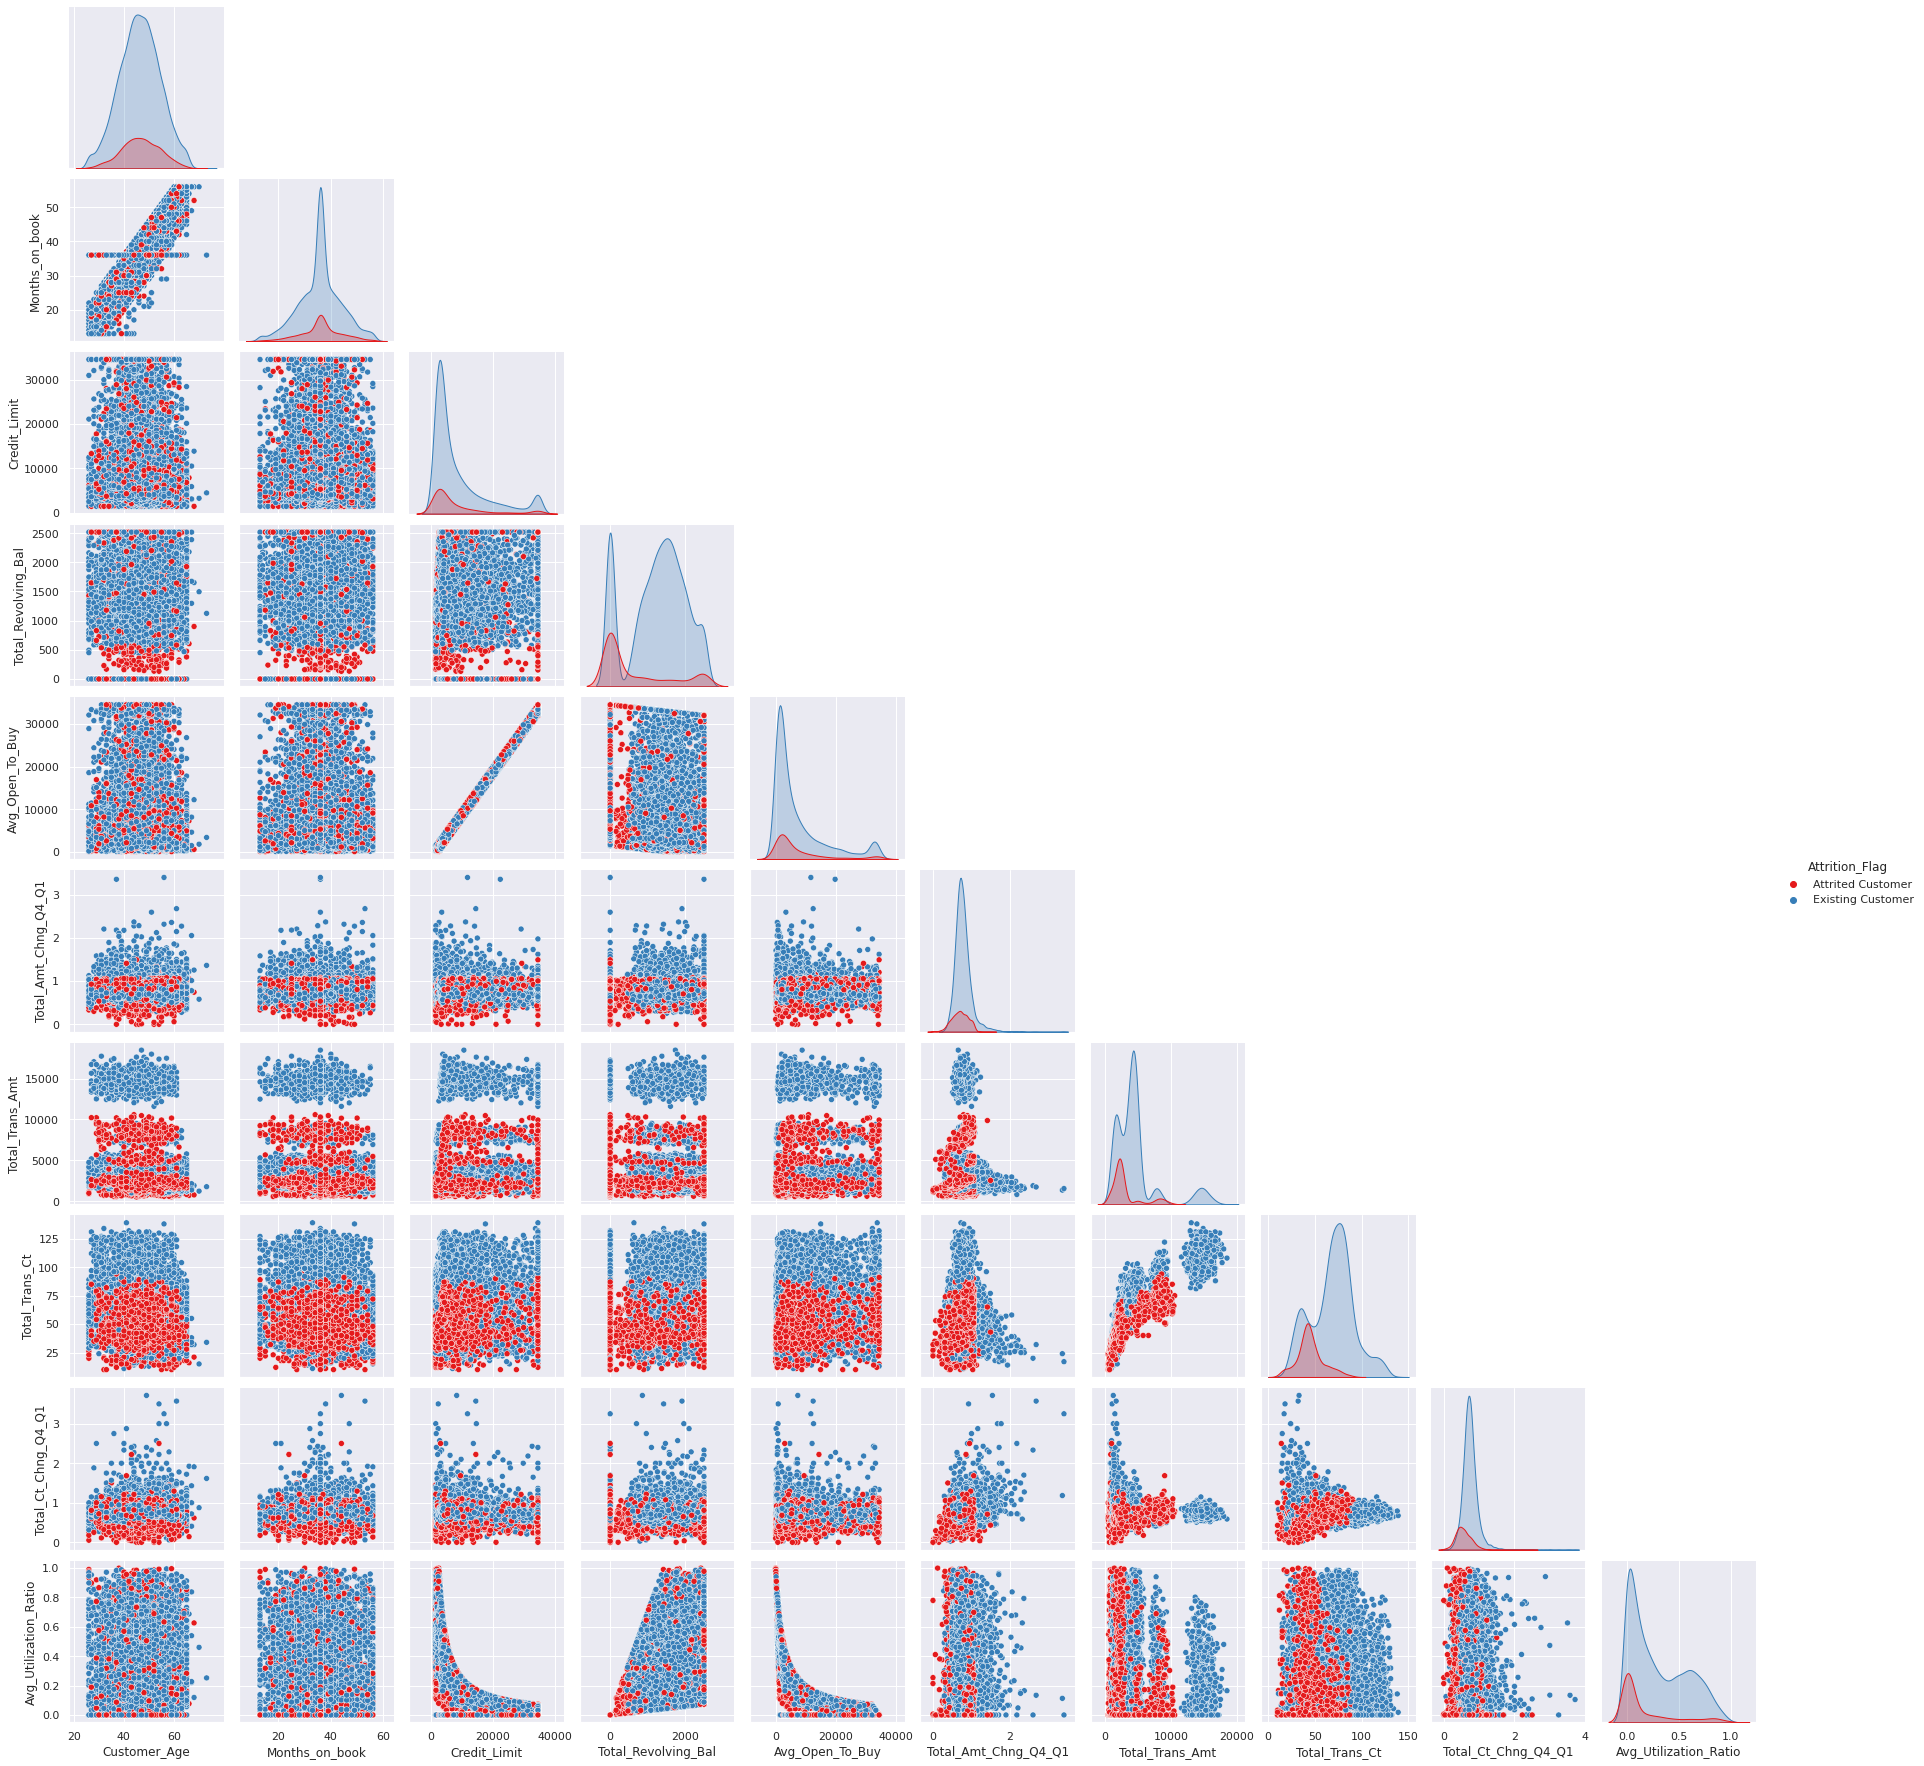

In [ ]:
sns.set_palette(sns.color_palette("Set1", 8))
sns.pairplot(data, hue="Attrition_Flag",corner=True)
plt.show()

**Observations**

- There are clusters formed with respect to attrition for the variables total revolving amount, total amount change Q4 to Q1, total transaction amount, total transaction count, total transaction count change Q4 to Q1
- There are strong correlation between a few columns as well

## **Data Preprocessing**

Pre-processing steps:

- Data Split into Dependent and Target sets
- Data Split to Train, Test and Validation sets
- Standardize feature names
- Drop unnecessary columns (Client Number, Customer Age, Dependent Count, Months on Book, Open to Buy, Credit Limit)
- Missing Value/Incorrect Value treatment
Encoding
- Scaling/Outlier treatment

### **Building data transformer functions and classes**

In [ ]:
# Building a function to standardize columns

def feature_name_standardize(df: pd.DataFrame):
    df_ = df.copy()
    df_.columns = [i.replace(" ", "_").lower() for i in df_.columns]
    return df_

# Building a function to drop features

def drop_feature(df: pd.DataFrame, features: list = []):
    df_ = df.copy()
    if len(features) != 0:
        df_ = df_.drop(columns=features)
        
    return df_

# Building a function to treat incorrect value

def mask_value(df: pd.DataFrame, feature: str = None, value_to_mask: str = None, masked_value: str = None):
    df_ = df.copy()
    if feature != None and value_to_mask != None:
        if feature in df_.columns:
            df_[feature] = df_[feature].astype('object')
            df_.loc[df_[df_[feature] == value_to_mask].index, feature] = masked_value
            df_[feature] = df_[feature].astype('category')
            
    return df_

# Building a custom imputer

def impute_category_unknown(df: pd.DataFrame, fill_value: str):
    df_ = df.copy()
    for col in df_.select_dtypes(include='category').columns.tolist():
        df_[col] = df_[col].astype('object')
        df_[col] = df_[col].fillna('Unknown')
        df_[col] = df_[col].astype('category')
    return df_

# Building a custom data preprocessing class with fit and transform methods for standardizing column names

class FeatureNamesStandardizer(TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Returns dataframe with column names in lower case with underscores in place of spaces."""
        X_ = feature_name_standardize(X)
        return X_
    
    
# Building a custom data preprocessing class with fit and transform methods for dropping columns

class ColumnDropper(TransformerMixin):
    def __init__(self, features: list):
        self.features = features

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Given a list of columns, returns a dataframe without those columns."""
        X_ = drop_feature(X, features=self.features)
        return X_
        
    

# Building a custom data preprocessing class with fit and transform methods for custom value masking

class CustomValueMasker(TransformerMixin):
    def __init__(self, feature: str, value_to_mask: str, masked_value: str):
        self.feature = feature
        self.value_to_mask = value_to_mask
        self.masked_value = masked_value

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Return a dataframe with the required feature value masked as required."""
        X_ = mask_value(X, self.feature, self.value_to_mask, self.masked_value)
        return X_
    
    
# Building a custom class to one-hot encode using pandas
class PandasOneHot(TransformerMixin):
    def __init__(self, columns: list = None):
        self.columns = columns

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Return a dataframe with the required feature value masked as required."""
        X_ = pd.get_dummies(X, columns = self.columns, drop_first=True)
        return X_
    
# Building a custom class to fill nulls with Unknown
class FillUnknown(TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Return a dataframe with the required feature value masked as required."""
        X_ = impute_category_unknown(X, fill_value='Unknown')
        return X_

Firstly we'll work on building models individually after data pre-processing, and later we'll build an ML pipeline to run end to end process of pre-processing and model building. We are creating a data copy for the first part.

**Creating data copy**

In [ ]:
df = data1.copy()

Defining the static variables

In [ ]:
# The static variables

# For dropping columns
columns_to_drop = [
    "clientnum",
    "credit_limit",
    "dependent_count",
    "months_on_book",
    "avg_open_to_buy",
    "customer_age",
]

# For masking a particular value in a feature
column_to_mask_value = "income_category"
value_to_mask = "abc"
masked_value = "Unknown"

# Random state and loss
seed = 1
loss_func = "logloss"

# Test and Validation sizes
test_size = 0.2
val_size = 0.25

# Dependent Varibale Value map
target_mapper = {"Attrited Customer": 1, "Existing Customer": 0}

### **Data Type Conversions**

Here we are converting Object data type to Category

In [ ]:
df["Attrition_Flag"].replace( "Attrited Customer", 1, inplace=True)
df["Attrition_Flag"].replace("Existing Customer", 0,  inplace=True)

In [ ]:
df.head()

CLIENTNUM Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383              0            45      M                3   
1  818770008              0            49      F                5   
2  713982108              0            51      M                3   
3  769911858              0            40      F                4   
4  709106358              0            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School            NaN  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3     12691.000                  777        11914.000   
1                      2      8256.000                  864         7392.000   
2                      0      3418.000                    0         3418.000   
3                      1      3313.000                 2517          796.000   
4                      0      4716.000                    0         4716.000   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  
0                  0.061  
1                  0.105  
2                  0.000  
3                  0.760  
4                  0.000

In [ ]:
cat_columns = df.select_dtypes(include="object").columns.tolist()
df[cat_columns] = df[cat_columns].astype("category")

### **Separating target variable and other variables**

In [ ]:
X = df.drop(columns="Attrition_Flag")
y = df["Attrition_Flag"]

### **Splitting the data into train/test**

**Note:** We will split the data into train and test as data size is very small to create validation set as well. We will be using stratified sampling technique to ensure that relative class frequencies are approximately preserved in each train and validation fold.

In [ ]:
# Splitting data into training, validation and test sets:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, 
                                                  random_state=1, stratify=y_temp)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 20) (2026, 20) (2026, 20)


**SimpleImputer** provides various basic strategies to impute the missing values. We fit the imputer on the train set and then impute the nulls in the different datasets i.e train, test and validation

In [ ]:
df.head()

CLIENTNUM  Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383               0            45      M                3   
1  818770008               0            49      F                5   
2  713982108               0            51      M                3   
3  769911858               0            40      F                4   
4  709106358               0            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School            NaN  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3     12691.000                  777        11914.000   
1                      2      8256.000                  864         7392.000   
2                      0      3418.000                    0         3418.000   
3                      1      3313.000                 2517          796.000   
4                      0      4716.000                    0         4716.000   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  
0                  0.061  
1                  0.105  
2                  0.000  
3                  0.760  
4                  0.000

In [ ]:
# Creating dummy variables for categorical variables
X_train = pd.get_dummies(data=X_train, drop_first=True)
X_val = pd.get_dummies(data=X_val, drop_first=True)
X_test = pd.get_dummies(data=X_test, drop_first=True)

In [ ]:
print("Training: \n", y_train.value_counts(normalize=True))
print("\n\nValidation: \n", y_val.value_counts(normalize=True))
print("\n\nTest: \n", y_test.value_counts(normalize=True))

Training: 
 0   0.839
1   0.161
Name: Attrition_Flag, dtype: float64


Validation: 
 0   0.839
1   0.161
Name: Attrition_Flag, dtype: float64


Test: 
 0   0.840
1   0.160
Name: Attrition_Flag, dtype: float64


### **Data processing**

Data pre-processing is one of the the most important parts of the job before starting to train the model with the dataset. We need to impute missing values, fix any illogical data value in columns, convert category columns to numeric (either ordinal, or binary using one-hot encoding), scale the data to deal with the distribution skewness and outliers, before feeding the data to a model.  

We are using the pre-available transformation classes and the custom classes that we created to first fit the training data and then transform the train, validation and test dataset. This is the standard logical practice to keep the influence of test and validation data in the train dataset to prevent/avoid data leakage while training or validating the model.

In [ ]:
# To Standardize feature names
feature_name_standardizer = FeatureNamesStandardizer()

X_train = feature_name_standardizer.fit_transform(X_train)
X_val = feature_name_standardizer.transform(X_val)
X_test = feature_name_standardizer.transform(X_test)

# To Drop unnecessary columns
column_dropper = ColumnDropper(features=columns_to_drop)

X_train = column_dropper.fit_transform(X_train)
X_val = column_dropper.transform(X_val)
X_test = column_dropper.transform(X_test)

# To Mask incorrect/meaningless value of a feature
value_masker = CustomValueMasker(
    feature=column_to_mask_value, value_to_mask=value_to_mask, masked_value=masked_value
)

X_train = value_masker.fit_transform(X_train)
X_val = value_masker.transform(X_val)
X_test = value_masker.transform(X_test)

# To impute categorical Nulls to Unknown
cat_columns = X_train.select_dtypes(include="category").columns.tolist()
imputer = FillUnknown()

X_train[cat_columns] = imputer.fit_transform(X_train[cat_columns])
X_val[cat_columns] = imputer.transform(X_val[cat_columns])
X_test[cat_columns] = imputer.transform(X_test[cat_columns])

# To encode the data
one_hot = PandasOneHot()

X_train = one_hot.fit_transform(X_train)
X_val = one_hot.transform(X_val)
X_test = one_hot.transform(X_test)


# Scale the numerical columns
robust_scaler = RobustScaler(with_centering=False, with_scaling=True)
num_columns = [
    "total_relationship_count",
    "months_inactive_12_mon",
    "contacts_count_12_mon",
    "total_revolving_bal",
    "total_amt_chng_q4_q1",
    "total_trans_amt",
    "total_trans_ct",
    "total_ct_chng_q4_q1",
    "avg_utilization_ratio",
]

X_train[num_columns] = pd.DataFrame(
    robust_scaler.fit_transform(X_train[num_columns]),
    columns=num_columns,
    index=X_train.index,
)
X_val[num_columns] = pd.DataFrame(
    robust_scaler.transform(X_val[num_columns]), columns=num_columns, index=X_val.index
)
X_test[num_columns] = pd.DataFrame(
    robust_scaler.transform(X_test[num_columns]),
    columns=num_columns,
    index=X_test.index,
)

In [ ]:
print(
    "Training data shape: \n\n",
    X_train.shape,
    "\n\nValidation Data Shape: \n\n",
    X_val.shape,
    "\n\nTesting Data Shape: \n\n",
    X_test.shape,
)

Training data shape: 

 (6075, 25) 

Validation Data Shape: 

 (2026, 25) 

Testing Data Shape: 

 (2026, 25)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   attrition_flag            10127 non-null  category
 1   customer_age              10127 non-null  int64   
 2   gender                    10127 non-null  category
 3   dependent_count           10127 non-null  int64   
 4   education_level           10127 non-null  category
 5   marital_status            10127 non-null  category
 6   income_category           10127 non-null  category
 7   card_category             10127 non-null  category
 8   months_on_book            10127 non-null  int64   
 9   total_relationship_count  10127 non-null  int64   
 10  months_inactive_12_mon    10127 non-null  int64   
 11  contacts_count_12_mon     10127 non-null  int64   
 12  credit_limit              10127 non-null  float64 
 13  total_revolving_bal       10127 non-null  int6

## **Model Building Considerations**

#### Model evaluation criterion:

**Model can make wrong predictions as**

- Predicting a customer will attrite and the customer does not attrite - Loss of resources
- Predicting a customer will not attrite and the customer attrites - Loss of opportunity for churning the customer

**Which case is more important?**

- Predicting that customer will not attrite, but actually attrites, would result in loss for the bank since if predicted correctly, marketing/sales team could have contacted the customer to retain them. This would result in losses. So, the false negatives should be minimized.

**How to reduce this loss i.e need to reduce False Negatives?**

- Company wants Recall to be maximized, greater the Recall lesser the chances of false negatives.


**Let's start by building different models using KFold and cross_val_score and tune the best model using RandomizedSearchCV**

- Stratified K-Folds cross-validation provides dataset indices to split data into train/validation sets. Split dataset into k consecutive folds (without shuffling by default) keeping the distribution of both classes in each fold the same as the target variable. Each fold is then used once as validation while the k - 1 remaining folds form the training set.






### **Model Evaluation Functions - Scoring & Confusion Matrix**

We are creating a few functions to score the models, show the confusion matrix

**Function to Get Scores**

In [ ]:
def get_metrics_score(
    model, train, test, train_y, test_y, threshold=0.5, flag=False, roc=True
):
    """
    Function to calculate different metric scores of the model - Accuracy, Recall, Precision, and F1 score
    model: classifier to predict values of X
    train, test: Independent features
    train_y,test_y: Dependent variable
    threshold: thresold for classifiying the observation as 1
    flag: If the flag is set to True then only the print statements showing different will be displayed. The default value is set to True.
    roc: If the roc is set to True then only roc score will be displayed. The default value is set to False.
    """
    # defining an empty list to store train and test results

    score_list = []

    pred_train = model.predict_proba(train)[:, 1] > threshold
    pred_test = model.predict_proba(test)[:, 1] > threshold

    pred_train = np.round(pred_train)
    pred_test = np.round(pred_test)

    train_acc = accuracy_score(pred_train, train_y)
    test_acc = accuracy_score(pred_test, test_y)

    train_recall = recall_score(train_y, pred_train)
    test_recall = recall_score(test_y, pred_test)

    train_precision = precision_score(train_y, pred_train)
    test_precision = precision_score(test_y, pred_test)

    train_f1 = f1_score(train_y, pred_train)
    test_f1 = f1_score(test_y, pred_test)

    pred_train_proba = model.predict_proba(train)[:, 1]
    pred_test_proba = model.predict_proba(test)[:, 1]

    train_roc_auc = roc_auc_score(train_y, pred_train_proba)
    test_roc_auc = roc_auc_score(test_y, pred_test_proba)

    score_list.extend(
        (
            train_acc,
            test_acc,
            train_recall,
            test_recall,
            train_precision,
            test_precision,
            train_f1,
            test_f1,
            train_roc_auc,
            test_roc_auc,
        )
    )

    if flag == True:

        print("Accuracy on training set : ", accuracy_score(pred_train, train_y))
        print("Accuracy on test set : ", accuracy_score(pred_test, test_y))
        print("Recall on training set : ", recall_score(train_y, pred_train))
        print("Recall on test set : ", recall_score(test_y, pred_test))
        print("Precision on training set : ", precision_score(train_y, pred_train))
        print("Precision on test set : ", precision_score(test_y, pred_test))
        print("F1 on training set : ", f1_score(train_y, pred_train))
        print("F1 on test set : ", f1_score(test_y, pred_test))

    if roc == True:
        if flag == True:
            print(
                "ROC-AUC Score on training set : ",
                roc_auc_score(train_y, pred_train_proba),
            )
            print(
                "ROC-AUC Score on test set : ", roc_auc_score(test_y, pred_test_proba)
            )

    return score_list  # returning the list with train and test scores

**Function to Draw Confusion Matrix**

In [ ]:
def make_confusion_matrix(model, test_X, y_actual, labels=[1, 0]):
    """
    model : classifier to predict values of X
    test_X: test set
    y_actual : ground truth

    """
    y_predict = model.predict(test_X)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[1, 0])
    df_cm = pd.DataFrame(
        cm,
        index=[i for i in ["Actual - Attrited", "Actual - Existing"]],
        columns=[i for i in ["Predicted - Attrited", "Predicted - Existing"]],
    )
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(5, 3))
    sns.heatmap(df_cm, annot=labels, fmt="", cmap="Blues").set(title="Confusion Matrix")

**Function to Add Scores to Scoring Lists**

In [ ]:
# # defining empty lists to add train and test results

model_names = []
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []
roc_auc_train = []
roc_auc_test = []
cross_val_train = []


def add_score_model(model_name, score, cv_res):
    """Add scores to list so that we can compare all models score together"""
    model_names.append(model_name)
    acc_train.append(score[0])
    acc_test.append(score[1])
    recall_train.append(score[2])
    recall_test.append(score[3])
    precision_train.append(score[4])
    precision_test.append(score[5])
    f1_train.append(score[6])
    f1_test.append(score[7])
    roc_auc_train.append(score[8])
    roc_auc_test.append(score[9])
    cross_val_train.append(cv_res)

##  **Building the model**

We are building 7 models here, Logistic Regression, Decision Tree, Bagging, Random Forest, Gradient Boosting, Ada Boosting, Extreme Gradient Boosting


###**Build and Train Models**

We are building below 7 models:
 
- Logistic Regression
- Decision Tree Classification (Classification and Regression Trees - CART)
- Bagging
- Random Forest Classification
- Gradient Boosting Machine
- Adaptive Boosting
- eXtreme Gradient Boosting

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic Regression", LogisticRegression(random_state=1)))
models.append(("Decision Tree", DecisionTreeClassifier(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))


results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models
score = []
# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    score.append(scores)
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Logistic Regression: 55.635792778649915
Decision Tree: 77.04761904761904
Bagging: 78.17425431711145
Random forest: 76.73992673992673
GBM: 80.93877551020408
Adaboost: 80.52904238618524
Xgboost: 80.63108320251177

Validation Performance:

Logistic Regression: 0.6104294478527608
Decision Tree: 0.8159509202453987
Bagging: 0.8343558282208589
Random forest: 0.8312883435582822
GBM: 0.8742331288343558
Adaboost: 0.8496932515337423
Xgboost: 0.8619631901840491


### **Plotting the cross-validation result comparison**

We are plotting the cross validation results for the 7 models in a Box plot, to check which models are potentially good.

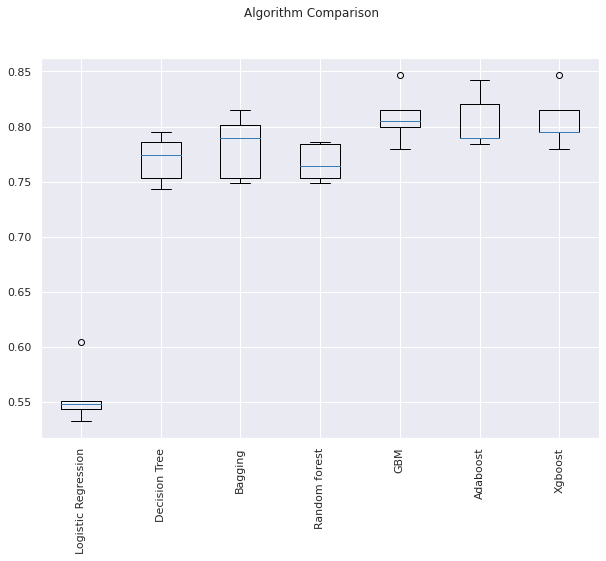

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)
plt.xticks(rotation=90);
plt.show()

It appears Adaboost, XGBoost, GBM are the models with good potential. Ada Boost also looks good with the higher end outlier performance score

The best models are XGBoost, GBM and AdaBoost respectively

### **Model evaluation criterion:**

### **Oversampling train data using SMOTE**

Our dataset has a huge imbalance in target variable labels. To deal with such datasets, we have a few tricks up our sleeves, which we call Imbalanced Classification.

Imbalanced classification involves developing predictive models on classification datasets that have a severe class imbalance.

The challenge of working with imbalanced datasets is that most machine learning techniques will ignore, and in turn have poor performance on the minority class, although typically it is performance on the minority class that is most important, which is the case in our study here.

One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. Instead, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique, or SMOTE for short.

In [ ]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 976
Before Oversampling, counts of label 'No': 5099 

After Oversampling, counts of label 'Yes': 5099
After Oversampling, counts of label 'No': 5099 

After Oversampling, the shape of train_X: (10198, 25)
After Oversampling, the shape of train_y: (10198,) 



### Build Models with Oversampled Data

#### Build and Train Models


We are building and training the same 7 models as before. We are however going to use the over-sampled training data for training the models.

In [ ]:
models_over = []

# Appending models into the list
models_over.append(("Logistic Regression UpSampling", LogisticRegression(random_state=1)))
models_over.append(("Decision Tree UpSampling", DecisionTreeClassifier(random_state=1)))
models_over.append(("Bagging UpSampling", BaggingClassifier(random_state=1)))
models_over.append(("Random forest UpSampling", RandomForestClassifier(random_state=1)))
models_over.append(("GBM UpSampling", GradientBoostingClassifier(random_state=1)))
models_over.append(("Adaboost UpSampling", AdaBoostClassifier(random_state=1)))
models_over.append(("Xgboost UpSampling", XGBClassifier(random_state=1, eval_metric="logloss")))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models
score = []

# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")
for name, model in models_over:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result_over = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
    )
    results.append(cv_result_over)
    names.append(name)
    print("{}: {}".format(name, cv_result_over.mean() * 100))

print("\n" "Validation Performance:" "\n")

for name, model in models_over:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    score.append(scores)
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Logistic Regression UpSampling: 88.3117627816583
Decision Tree UpSampling: 94.9990763724528
Bagging UpSampling: 95.76385922376801
Random forest UpSampling: 97.7643210375416
GBM UpSampling: 96.82302911350999
Adaboost UpSampling: 95.70507417883739
Xgboost UpSampling: 96.86222555754392

Validation Performance:

Logistic Regression UpSampling: 0.7760736196319018
Decision Tree UpSampling: 0.803680981595092
Bagging UpSampling: 0.852760736196319
Random forest UpSampling: 0.8834355828220859
GBM UpSampling: 0.9141104294478528
Adaboost UpSampling: 0.9233128834355828
Xgboost UpSampling: 0.9141104294478528


The best 3 models with respect to validation recall and cross validation score, are as follows:


- GBM trained with over/up-sampled data
- AdaBoost trained with over/up-sampled data
- XGBoost trained with over/up-sampled data

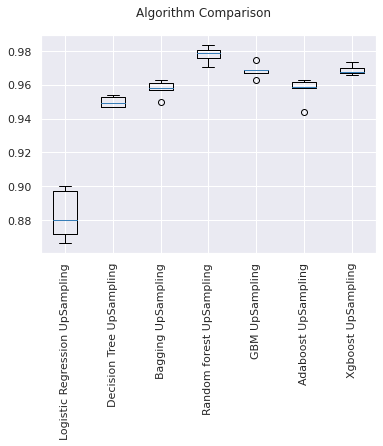

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure()

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)
plt.xticks(rotation=90);
plt.show()

### **Undersampling train data using Random Under Sampler**

Undersampling is another way of dealing with imbalance in the dataset.

Random undersampling involves randomly selecting examples from the majority class and deleting them from the training dataset until a balanced dataset is created.

In [ ]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [ ]:
print("Before Undersampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Undersampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Undersampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Undersampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Undersampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Undersampling, counts of label 'Yes': 976
Before Undersampling, counts of label 'No': 5099 

After Undersampling, counts of label 'Yes': 976
After Undersampling, counts of label 'No': 976 

After Undersampling, the shape of train_X: (1952, 25)
After Undersampling, the shape of train_y: (1952,) 



### Build Models with Undersampled Data

**Build and Train Models**

We are again building the same 7 models as before and training with the undersampled dataset, and use the validation dataset to score the models.

In [ ]:
models_under = []

# Appending models into the list
models_under.append(("Logistic Regression DownSampling", LogisticRegression(random_state=1)))
models_under.append(("Decision Tree DownSampling", DecisionTreeClassifier(random_state=1)))
models_under.append(("Bagging DownSampling", BaggingClassifier(random_state=1)))
models_under.append(("Random forest DownSampling", RandomForestClassifier(random_state=1)))
models_under.append(("GBM DownSampling", GradientBoostingClassifier(random_state=1)))
models_under.append(("Adaboost DownSampling", AdaBoostClassifier(random_state=1)))
models_under.append(("Xgboost DownSampling", XGBClassifier(random_state=1, eval_metric="logloss")))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models
score = []

# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")
for name, model in models_under:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result_under = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
    )
    results.append(cv_result_under)
    names.append(name)
    print("{}: {}".format(name, cv_result_under.mean() * 100))

print("\n" "Validation Performance:" "\n")

for name, model in models_under:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    score.append(scores)
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Logistic Regression DownSampling: 83.71219256933543
Decision Tree DownSampling: 89.65253793825224
Bagging DownSampling: 90.67765567765568
Random forest DownSampling: 94.26321297749868
GBM DownSampling: 94.77603349031921
Adaboost DownSampling: 92.41967556253272
Xgboost DownSampling: 94.46886446886447

Validation Performance:

Logistic Regression DownSampling: 0.8619631901840491
Decision Tree DownSampling: 0.8711656441717791
Bagging DownSampling: 0.9263803680981595
Random forest DownSampling: 0.9386503067484663
GBM DownSampling: 0.9631901840490797
Adaboost DownSampling: 0.9631901840490797
Xgboost DownSampling: 0.9601226993865031


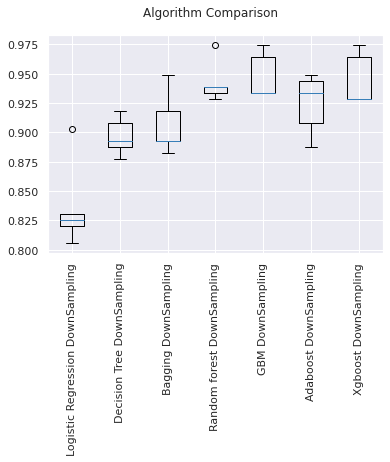

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure()

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)
plt.xticks(rotation=90);
plt.show()

The 3 best models are:

- XGBoost trained with undersampled data
- AdaBoost trained with undersampled data
- GBM trained with undersampled data  



**We will now try to tune these 3 models using Random Search CV**

#### Choice of models for tuning

- XGBoost with down-sampling has the best validation recall of 96.3%, along-with 95% cross validation score on train, and 0.99 AUC, which means is it has high possibility of performing very well in unseen dataset. There is a bit of over-fitting, which I expect to resolve by tuning.  

- AdaBoost is generalizing the model very well, it is neither over-fitting, nor has any bias, AUC is 0.985 and cross validation score on train is 93%, recall on validation set is same as XGBoost (96.3%). I expect to improve the model (~94% on validation set) via tuning.  

- GBM is not overfitting, and neither it is suffering from bias or variance. Recall on validation is ~96%, accuracy on validation ~94%, AUC is ~0.99, cross validation score on train is ~95%. This would be my top choice because none of the training scores are 100%, meaning it is not trying to explain every single aspect of training data by overfitting it.

#### **Model Tuning using RandomizedSearchCV**

Typically a hyperparameter has a known effect on a model in the general sense, but it is not clear how to best set a hyperparameter for a given dataset. Further, many machine learning models have a range of hyperparameters and they may interact in nonlinear ways.

As such, it is often required to search for a set of hyperparameters that result in the best performance of a model on a dataset. This is called hyperparameter optimization, hyperparameter tuning, or hyperparameter search.

An optimization procedure involves defining a search space. This can be thought of geometrically as an n-dimensional volume, where each hyperparameter represents a different dimension and the scale of the dimension are the values that the hyperparameter may take on, such as real-valued, integer-valued, or categorical.

**Search Space:** Volume to be searched where each dimension represents a hyperparameter and each point represents one model configuration. A point in the search space is a vector with a specific value for each hyperparameter value. The goal of the optimization procedure is to find a vector that results in the best performance of the model after learning, such as maximum accuracy or minimum error.

A range of different optimization algorithms may be used, although two of the simplest and most common methods are random search and grid search.

**Random Search:** Define a search space as a bounded domain of hyperparameter values and randomly sample points in that domain.  

**Grid Search:** Define a search space as a grid of hyperparameter values and evaluate every position in the grid.

## **Hyperparameter Tuning**

### Tuning XGBOOST with Down Sampled data

Finding best parameter for high recall using Random Search with cross validation 

In [ ]:
%%time

# defining model
model = XGBClassifier(random_state=1, eval_metric="logloss")


# Parameter grid to pass in RandomizedSearchCV
param_grid={'n_estimators':np.arange(50,500,50),
            'scale_pos_weight':[2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05],
            'gamma':[0,1,3,5],
            'subsample':[0.8,0.9,1],
            'max_depth':np.arange(4,20,1),
            'reg_lambda':[5,10, 15, 20]} 

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
xgb_tuned = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=10, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
xgb_tuned.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(xgb_tuned.best_params_,xgb_tuned.best_score_))

Best parameters are {'subsample': 1, 'scale_pos_weight': 10, 'reg_lambda': 20, 'n_estimators': 150, 'max_depth': 5, 'learning_rate': 0.01, 'gamma': 0} with CV score=0.990753208499895:
CPU times: user 6.31 s, sys: 430 ms, total: 6.74 s
Wall time: 7min 35s


Building the model with the resulted best parameters

In [ ]:
# building model with best parameters
xgb_tuned_model = XGBClassifier(
    n_estimators=150,
    scale_pos_weight=10,
    subsample=1,
    reg_lambda=20,
    max_depth=5,
    learning_rate=0.01,
    gamma=0,
    eval_metric="logloss",
    random_state= 1,
)
# Fit the model on training data
xgb_tuned_model.fit(X_train_un, y_train_un)

XGBClassifier(eval_metric='logloss', learning_rate=0.01, max_depth=5,
              n_estimators=150, random_state=1, reg_lambda=20,
              scale_pos_weight=10)

In [ ]:
# Get scores 

xgb_tuned_model_score = get_metrics_score(
    xgb_tuned_model, X_train, X_val, y_train, y_val
)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

scoring = "recall"
xgb_down_cv = cross_val_score(
    estimator=xgb_tuned_model, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
)


add_score_model(
    "XGB Tuned with Down Sampling", xgb_tuned_model_score, xgb_down_cv.mean()
)

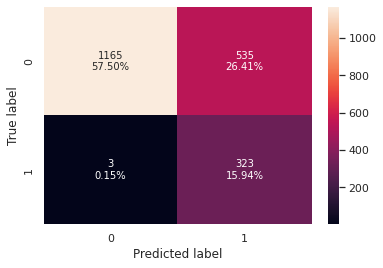

In [ ]:
# Confusion matrix on validation
confusion_matrix_sklearn(xgb_tuned_model, X_val, y_val)

### Tuning AdaBoost with Down Sampled data

#### Finding best parameter for high recall using Random Search with cross validation


In [ ]:

%%time

# defining model
model = AdaBoostClassifier(random_state=1)



# Parameter grid to pass in RandomizedSearchCV
param_grid={'n_estimators':np.arange(50,2000,50),
            'learning_rate':[0.01,0.1,0.2,0.05]} 

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
ada_tuned = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=10, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
ada_tuned.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(ada_tuned.best_params_,ada_tuned.best_score_))

Best parameters are {'n_estimators': 950, 'learning_rate': 0.05} with CV score=0.9374921102461604:
CPU times: user 17.5 s, sys: 1.47 s, total: 19 s
Wall time: 30min 51s


Building the model with the resulted best parameters

In [ ]:
# building model with best parameters
ada_tuned_model = AdaBoostClassifier(
    n_estimators=1050, learning_rate=0.1, random_state=1
)
# Fit the model on training data
ada_tuned_model.fit(X_train_un, y_train_un)

AdaBoostClassifier(learning_rate=0.1, n_estimators=1050, random_state=1)

Get scores

In [ ]:
ada_tuned_model_score = get_metrics_score(
    ada_tuned_model, X_train, X_val, y_train, y_val
)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

scoring = "recall"
ada_down_cv = cross_val_score(
    estimator=ada_tuned_model, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
)


add_score_model(
    "AdaBoost Tuned with Down Sampling", ada_tuned_model_score, ada_down_cv.mean()
)

Confusion matrix on validation

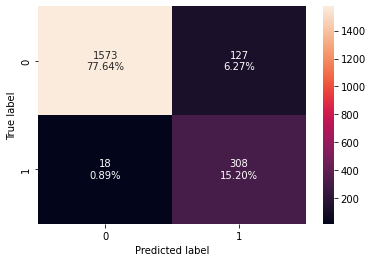

In [ ]:
confusion_matrix_sklearn(ada_tuned_model, X_val, y_val)

### Tuning GBM with Down Sampled data

Finding best parameter for high recall using Random Search with cross validation

In [ ]:
%%time

# defining model
model = GradientBoostingClassifier(random_state=1)

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10, 15] 


# Parameter grid to pass in RandomizedSearchCV
param_grid={'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf} 

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
gbm_tuned = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=10, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
gbm_tuned.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(gbm_tuned.best_params_,gbm_tuned.best_score_))

Best parameters are {'n_estimators': 700, 'min_samples_split': 100, 'min_samples_leaf': 10, 'max_features': 'auto', 'max_depth': 15} with CV score=0.9590363980643805:
CPU times: user 29.9 s, sys: 1.86 s, total: 31.7 s
Wall time: 37min 38s


Building the model with the resulted best parameters

In [ ]:
# building model with best parameters
gbm_tuned_model = GradientBoostingClassifier(
    n_estimators=700,
    max_features="auto",
    max_depth=25,
    min_samples_split=2,
    min_samples_leaf=15,
    random_state=1,
)
# Fit the model on training data
gbm_tuned_model.fit(X_train_un, y_train_un)

GradientBoostingClassifier(max_depth=25, max_features='auto',
                           min_samples_leaf=15, n_estimators=700,
                           random_state=1)

Get scores

In [ ]:
gbm_tuned_model_score = get_metrics_score(
    gbm_tuned_model, X_train, X_val, y_train, y_val
)


kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

scoring = "recall"
gbm_down_cv = cross_val_score(
    estimator=gbm_tuned_model, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
)


add_score_model(
    "GBM Tuned with Down Sampling", gbm_tuned_model_score, gbm_down_cv.mean()
)

Confusion matrix on validation

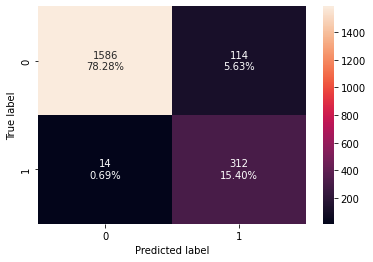

In [ ]:
confusion_matrix_sklearn(gbm_tuned_model, X_val, y_val)

###  Comparing all models 

In [ ]:
comparison_frame = pd.DataFrame(
    {
        "Model": model_names,
        "Cross_Val_Score_Train": cross_val_train,
        
        "Train_Recall": recall_train,
        "Test_Recall": recall_test,
    
    }
)


for col in comparison_frame.select_dtypes(include="float64").columns.tolist():
    comparison_frame[col] = round(comparison_frame[col] * 100, 0).astype(int)


comparison_frame.tail(4).sort_values(
    by=["Cross_Val_Score_Train", "Test_Recall"], ascending=False
)

Model  Cross_Val_Score_Train  Train_Recall  \
1       GBM Tuned with Down Sampling                     96           100   
2       GBM Tuned with Down Sampling                     96           100   
0  AdaBoost Tuned with Down Sampling                     94            96   

   Test_Recall  
1           96  
2           96  
0           94

In [ ]:
comparison_frame = pd.DataFrame(
    {
        "Model": model_names,
        "Cross_Val_Score_Train": cross_val_train,
        "Train_Accuracy": acc_train,
        "Test_Accuracy": acc_test,
        "Train_Recall": recall_train,
        "Test_Recall": recall_test,
        "Train_Precision": precision_train,
        "Test_Precision": precision_test,
        "Train_F1": f1_train,
        "Test_F1": f1_test,
        "Train_ROC_AUC": roc_auc_train,
        "Test_ROC_AUC": roc_auc_test,
    }
)


for col in comparison_frame.select_dtypes(include="float64").columns.tolist():
    comparison_frame[col] = round(comparison_frame[col] * 100, 0).astype(int)


comparison_frame.tail(4).sort_values(
    by=["Cross_Val_Score_Train", "Test_Recall"], ascending=False
)

Model  Cross_Val_Score_Train  Train_Accuracy  \
24  XGB Tuned with Down Sampling                     99              73   
21                           GBM                     81              97   
23                       Xgboost                     81              97   
22                      Adaboost                     80              96   

    Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  \
24             73           100           99               37              38   
21             97            87           87               93              93   
23             97            85           86               94              93   
22             96            83           85               89              90   

    Train_F1  Test_F1  Train_ROC_AUC  Test_ROC_AUC  
24        54       55             97            96  
21        90       90             99            99  
23        89       89             99            99  
22        86       88             99            98

### Final Model Selection

- The XGBoost model with hyper parameter tuning and trained with undersampled dataset, has best recall on validation set of ~99%, but accuracy is lower than the human level accuracy (i,e, classifying everyone as non-attriting customers). Thus, we are not selecting this model as the final model
 
- The validation recall of ~97% is provided by the GBM with hyper parameter tuning trained with undersampled dataset, has validation accuracy of ~94%, and precision of ~74%, Validation AUC ~99%, Cross Validation Mean of 96%. Also, the model is neither suffering from bias, nor variance. We are selecting GBM Tuned with Down Sampling model as our final model

### Check Test Data on GBM Tuned and Trained with Downsampled Data

#### Feature Importance

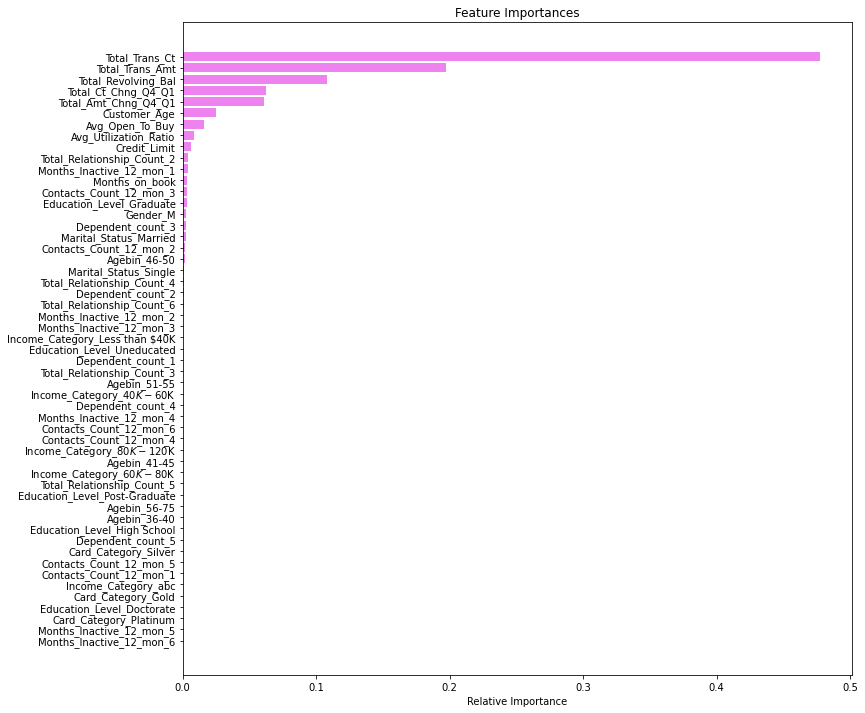

In [ ]:
feature_names = X_train.columns
importances = gbm_tuned_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Test scores

Let's check the performance of the model on Test (unseen) dataset.

In [ ]:
gbm_tuned_model_test_score = get_metrics_score(
    gbm_tuned_model, X_train, X_test, y_train, y_test
)

final_model_names = ["gbm Tuned Down-sampled Trained"]
final_acc_train = [gbm_tuned_model_test_score[0]]
final_acc_test = [gbm_tuned_model_test_score[1]]
final_recall_train = [gbm_tuned_model_test_score[2]]
final_recall_test = [gbm_tuned_model_test_score[3]]
final_precision_train = [gbm_tuned_model_test_score[4]]
final_precision_test = [gbm_tuned_model_test_score[5]]
final_f1_train = [gbm_tuned_model_test_score[6]]
final_f1_test = [gbm_tuned_model_test_score[7]]
final_roc_auc_train = [gbm_tuned_model_test_score[8]]
final_roc_auc_test = [gbm_tuned_model_test_score[9]]

final_result_score = pd.DataFrame(
    {
        "Model": final_model_names,
        "Train_Accuracy": final_acc_train,
        "Test_Accuracy": final_acc_test,
        "Train_Recall": final_recall_train,
        "Test_Recall": final_recall_test,
        "Train_Precision": final_precision_train,
        "Test_Precision": final_precision_test,
        "Train_F1": final_f1_train,
        "Test_F1": final_f1_test,
        "Train_ROC_AUC": final_roc_auc_train,
        "Test_ROC_AUC": final_roc_auc_test,
    }
)


for col in final_result_score.select_dtypes(include="float64").columns.tolist():
    final_result_score[col] = final_result_score[col] * 100


final_result_score

Model  Train_Accuracy  Test_Accuracy  \
0  gbm Tuned Down-sampled Trained          95.440         94.176   

   Train_Recall  Test_Recall  Train_Precision  Test_Precision  Train_F1  \
0       100.000       96.615           77.893          74.584    87.573   

   Test_F1  Train_ROC_AUC  Test_ROC_AUC  
0   84.182         99.921        99.284

The performance of the model with the test data is almost similar to the performance on the validation dataset.

#### Confusion Matrix

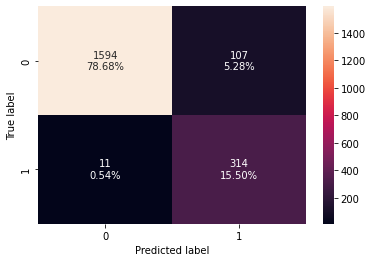

In [ ]:
confusion_matrix_sklearn(gbm_tuned_model, X_test, y_test)

### **Cumulative Lift/Gain Chart**

Cumulative lift/gain chart is important to understand how a model would perform in production system with unseen data

In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


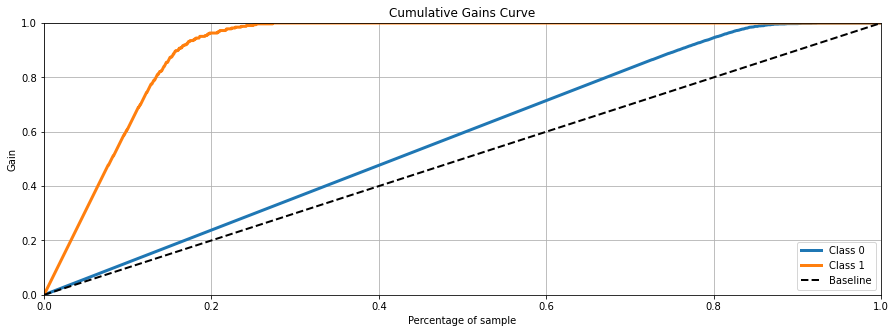

In [ ]:
import scikitplot as skplt

y_pred_prob = gbm_tuned_model.predict_proba(X_test)

skplt.metrics.plot_cumulative_gain(y_test, y_pred_prob, figsize=(15, 5))
plt.show()

The above chart shows, if we sort the customers in the descending order of the probability of attrition (class 1), and target the top ~30% of the population, we are most likely to find 100% of the people who would actually attrite

### ROC-AUC Curve

ROC AUC characteristic is important to understand how good the model is.

If the model is really good in identifying the classes, the Area Under Curve is really high, close to 1.

If the model can not distinguish the classes well, the Area Under Curve is really low, close to 0.5.

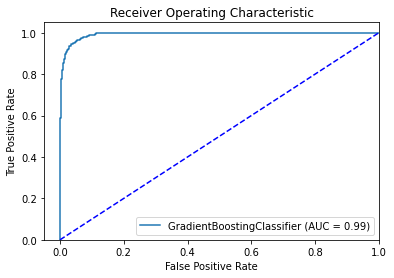

In [ ]:
plot_roc_curve(gbm_tuned_model, X_test, y_test)
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], "b--")
plt.xlim([-0.05, 1])
plt.ylim([0, 1.05])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

Our model appears to be really good, since the AUC is almost 1.

### Productionizing the model

Now that we have finalized our model, we'll build a model pipeline to streamline all the steps of model building. We'll start will the initial dataset and proceed with the pipeline building steps.

Machine Learning (ML) pipeline, theoretically, represents different steps including data transformation and prediction through which data passes. The outcome of the pipeline is the trained model which can be used for making the predictions. Sklearn.pipeline is a Python implementation of ML pipeline. Instead of going through the model fitting and data transformation steps for the training and test datasets separately, we can use Sklearn.pipeline to automate these steps. Here is the diagram representing the pipeline for training our machine learning model based on supervised learning, and then using test data to predict the labels.

### Set Static variables

In [ ]:
# The static variables
# Random state and loss
seed = 1
loss_func = "logloss"

# Test and Validation sizes
test_size = 0.2
val_size = 0.25

# Dependent Varibale Value map
target_mapper = {"Attrited Customer": 1, "Existing Customer": 0}

df_pipe = data.copy()
cat_columns = df_pipe.select_dtypes(include="object").columns.tolist()
df_pipe[cat_columns] = df_pipe[cat_columns].astype("category")

### Dependent and independent variables

In [ ]:
X = df_pipe.drop(columns=["Attrition_Flag"])
y = df_pipe["Attrition_Flag"].map(target_mapper)

### Split data in Train, Validation and Test sets

In [ ]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=test_size, random_state=seed, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=val_size, random_state=seed, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 20) (2026, 20) (2026, 20)


In [ ]:
print(y_train.value_counts(normalize=True))
print(y_val.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

0   0.839
1   0.161
Name: Attrition_Flag, dtype: float64
0   0.839
1   0.161
Name: Attrition_Flag, dtype: float64
0   0.840
1   0.160
Name: Attrition_Flag, dtype: float64


### Undersampling the training data since that generalized this model really well

In [ ]:
under_sample = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

### Data processing Steps

In [ ]:
# For dropping columns
columns_to_drop = [
    "clientnum",
    "credit_limit",
    "dependent_count",
    "months_on_book",
    "avg_open_to_buy",
    "customer_age",
]

# For masking a particular value in a feature
column_to_mask_value = "income_category"
value_to_mask = "abc"
masked_value = "Unknown"

# One-hot encoding columns
columns_to_encode = [
    "gender",
    "education_level",
    "marital_status",
    "income_category",
    "card_category",
]

# Numerical Columns
num_columns = [
    "total_relationship_count",
    "months_inactive_12_mon",
    "contacts_count_12_mon",
    "total_revolving_bal",
    "total_amt_chng_q4_q1",
    "total_trans_amt",
    "total_trans_ct",
    "total_ct_chng_q4_q1",
    "avg_utilization_ratio",
]

# Columns for null imputation with Unknown
columns_to_null_imp_unknown = ["education_level", "marital_status"]

### Build the pipeline

In [ ]:
# To Standardize feature names
feature_name_standardizer = FeatureNamesStandardizer()

# To Drop unnecessary columns
column_dropper = ColumnDropper(features=columns_to_drop)

# To Mask incorrect/meaningless value of a feature
value_masker = CustomValueMasker(
    feature=column_to_mask_value, value_to_mask=value_to_mask, masked_value=masked_value
)

# Missing value imputation
imputer = FillUnknown()

# To encode the categorical data
one_hot = OneHotEncoder(handle_unknown="ignore")

# To scale numerical columns
scaler = RobustScaler()


# creating a transformer for feature name standardization and dropping columns
cleanser = Pipeline(
    steps=[
        ("feature_name_standardizer", feature_name_standardizer),
        ("column_dropper", column_dropper),
        ("value_mask", value_masker),
        ("imputation", imputer),
    ]
)

# creating a transformer for data encoding

encode_transformer = Pipeline(steps=[("onehot", one_hot)])
num_scaler = Pipeline(steps=[("scale", scaler)])

preprocessor = ColumnTransformer(
    transformers=[
        ("encoding", encode_transformer, columns_to_encode),
        ("scaling", num_scaler, num_columns),
    ],
    remainder="passthrough",
)

# Model

gbm_tuned_model = GradientBoostingClassifier(
    n_estimators=700,
    max_features="auto",
    max_depth=25,
    min_samples_split=2,
    min_samples_leaf=15,
    random_state=seed,
)

# Creating new pipeline with best parameters
model_pipe = Pipeline(
    steps=[
        ("cleanse", cleanser),
        ("preprocess", preprocessor),
        ("model", gbm_tuned_model),
    ]
)
# Fit the model on training data
model_pipe.fit(X_train_un, y_train_un)

Pipeline(steps=[('cleanse',
                 Pipeline(steps=[('feature_name_standardizer',
                                  <__main__.FeatureNamesStandardizer object at 0x7fd52227b890>),
                                 ('column_dropper',
                                  <__main__.ColumnDropper object at 0x7fd52227b910>),
                                 ('value_mask',
                                  <__main__.CustomValueMasker object at 0x7fd52227be50>),
                                 ('imputation',
                                  <__main__.FillUnknown object at 0x7fd52227b9d0>)])),
                ('preprocess',
                 ColumnTran...
                                                                   RobustScaler())]),
                                                  ['total_relationship_count',
                                                   'months_inactive_12_mon',
                                                   'contacts_count_12_mon',
                     

### Score the pipeline using test data

**Accuracy**

In [ ]:
print(
    "Accuracy on Test is: {}%".format(round(model_pipe.score(X_test, y_test) * 100, 0))
)

Accuracy on Test is: 94.0%


**Recall**

In [ ]:
pred_train_p = model_pipe.predict_proba(X_train_un)[:, 1] > 0.5
pred_test_p = model_pipe.predict_proba(X_test)[:, 1] > 0.5

pred_train_p = np.round(pred_train_p)
pred_test_p = np.round(pred_test_p)

train_acc_p = accuracy_score(pred_train_p, y_train_un)
test_acc_p = accuracy_score(pred_test_p, y_test)

train_recall_p = recall_score(y_train_un, pred_train_p)
test_recall_p = recall_score(y_test, pred_test_p)

In [ ]:
print("Recall on Test is: {}%".format(round(test_recall_p * 100, 0)))

Recall on Test is: 96.0%


## **Actionable Insights and Recommendations**

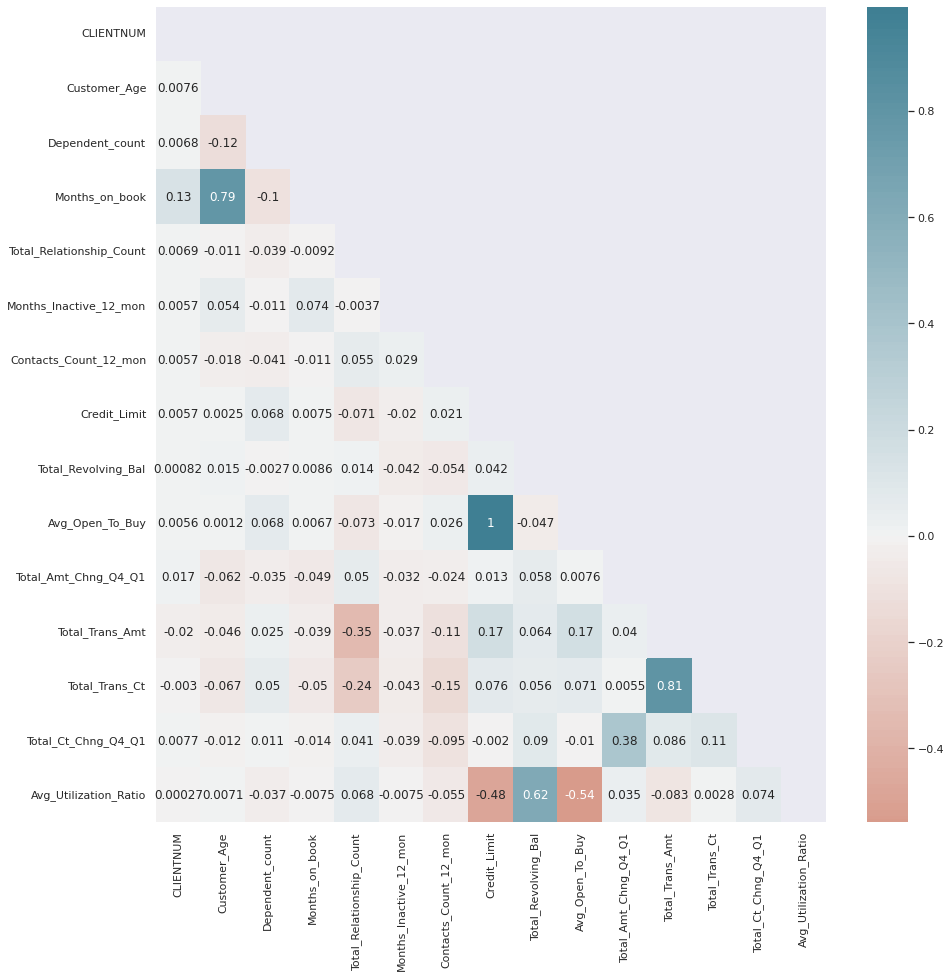

In [ ]:
mask = np.zeros_like(data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


sns.set(rc={"figure.figsize": (15, 15)})

sns.heatmap(
    data.corr(),
    cmap=sns.diverging_palette(20, 220, n=200),
    annot=True,
    mask=mask,
    center=0,
)
plt.show()

#### **Recommendations & Insights**

### **The most important features to understand customer credit card churn, are:**

a) Total Transaction Count

b) Total Transaction Amount

c) Total Revolving Balance

d) Total Amount Change Q4 to Q1

e) Total Count Change Q4 to Q1

f) Total Relationship Count
 
- All of these features are negatively correlated with the Attrition Flag, meaning, the lower the values of these features, the higher the chances of a customer to attrite
 

- Bank should connect with the customer more often to increase the connect, and provide the customer with various offers and schemes to increase relationships of the customer with the bank
 

- Bank should offer cashback schemes on credit cards, which might encourage the customers on using the credit card more often
 

- Bank should also offer credit limit increase for the customers who are regularly using the credit card. This should increase the credit card spends/transaction amounts.
 

- 0% interest EMI on credit card is also another offer that can be provided to customers to encourage the customers buy products of higher cost with credit card, and convert the expenditure to EMI, so that total transaction amount as well as transaction counts would increase. The balance would also revolve nicely.
 

- Along with the available types of cards, bank can introduce credit cards specific to online shopping (with % cashback offers) or online food ordering. This way the card will be used more frequently.
 

- With our model, we can predict which customers are likely to attrite, and according to the predicted probability, at least top 20-30% customers can be reached out to discuss credit card offers, credit limit increase etc, to try retain those customers.

#### **CONVERT TO HTML**

In [ ]:
! pip install nbconvert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! jupyter nbconvert --to html /content/5_Project_Credit_Card_Users_Churn_Prediction_Quazi_Nahida_Sultana.ipynb

[NbConvertApp] WARNING | pattern '/content/5_Project_Credit_Card_Users_Churn_Prediction_Quazi_Nahida_Sultana.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
